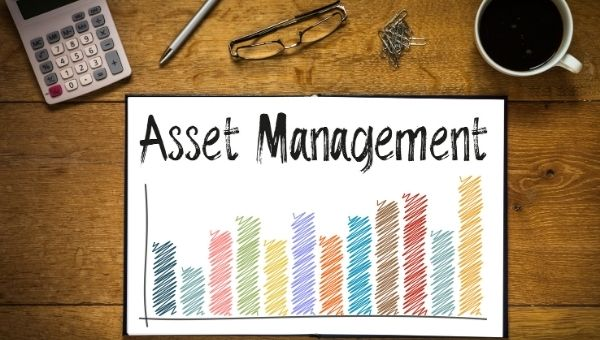

An Indonesian investment platform startup currently is focussing on a mutual fund app. On the application, people can register as user and invest in funds namely, Money Market, Fixed Income, Mixed and Stock Funds. The application also records transaction of both buying and selling funds as well as record the Asset Under Management (AUM) and invested amount of each funds. The startup also expands its business to include offering government bonds. In the upcoming month, the startup wants to offer a newly issued government bonds but the budget only enough for 30% of its users. The marketing team wants to do a marketing campaign that tailored based on the characteristic of the users. Therefore, the startup wants to segmentize the users into several segments based on the age group, gender and transaction behavior

# Importing Libraries

Importing all necessary libraries:

1. Numpy for mathematical operation and array manipulation
2. Pandas for data manipulation (including dataframe generation)
3. Matplotlib for data visualization
4. Seaborn for data visualization 




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import users dataset





Loading data (csv format) from Google Drive

In [2]:
url_users = 'https://drive.google.com/file/d/10ioc9ak8MGA_jxp0-A-ceT87TtI5YybW/view?usp=sharing'
path_users = 'https://drive.google.com/uc?export=download&id='+url_users.split('/')[-2]
users = pd.read_csv(path_users)

In [3]:
users.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [4]:
users.shape

(14712, 8)

Automatically we can see, that we need to convert two data into another datatype
1. User ID needs to be converted into string instead of integer
2. Registatration time needs to be converted into timestamp

But before hand, let's rename registration_import_datetime column into reg_date just to simplify the naming

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [6]:
users_col_change=users.copy()

##Data Clening

###Changing Column Name

In [7]:
users_col_change.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [8]:
users_col_change.rename(columns = {'registration_import_datetime':'reg_date'}, inplace = True)

In [9]:
users_col_change.columns

Index(['user_id', 'reg_date', 'user_gender', 'user_age', 'user_occupation',
       'user_income_range', 'referral_code_used', 'user_income_source'],
      dtype='object')

We have renamed column called registration_import_datetime into reg_date, now we begin converting the user_id and reg_date

###Convert Data Type

In [10]:
users_datatype=users_col_change.copy()



In [11]:
users_datatype['reg_date']=pd.to_datetime(users_datatype["reg_date"], format="%Y-%m-%d %H:%M:%S")
users_datatype['user_id']=users_datatype['user_id'].apply(str)

We have successfully converted:
1. user_id from integer to string
2. reg_date from object to datetime format

In [12]:
users_datatype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             14712 non-null  object        
 1   reg_date            14712 non-null  datetime64[ns]
 2   user_gender         14712 non-null  object        
 3   user_age            14712 non-null  int64         
 4   user_occupation     14712 non-null  object        
 5   user_income_range   14712 non-null  object        
 6   referral_code_used  5604 non-null   object        
 7   user_income_source  14712 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 919.6+ KB


###Check for Duplicate Values

For the next part, let's check duplicated data. We choose two columns (user_id and reg_date) to see if we have duplicated value. So far no duplicated values hence we don't need to do any omition for duplicated values

In [13]:
users_datatype[users_datatype[['user_id','reg_date']].duplicated()]

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source


###Handling Missing Values

No we need to check missing values, and decide what we need to do with this missing values

In [14]:
users_na=users_datatype.copy()

In [15]:
users_na.isna().sum()

user_id                  0
reg_date                 0
user_gender              0
user_age                 0
user_occupation          0
user_income_range        0
referral_code_used    9108
user_income_source       0
dtype: int64

There's only one column has missing values (9108 missing values to be exact), referral_code_used. referral_code_used means, users who registered by using referral code from previous users. The NaN values refered that users who register don't use the referral code. Instead of using NaN it's better to replace the NaN with Not Used

In [16]:
users_na[['referral_code_used']] = users_na[['referral_code_used']].fillna('not used')

In [17]:
users_na.isna().sum()

user_id               0
reg_date              0
user_gender           0
user_age              0
user_occupation       0
user_income_range     0
referral_code_used    0
user_income_source    0
dtype: int64

Now we have cleaned the missing values (by replacing NaN on referral_code_used with not used). Next step is checking outliers. In this dataframe, only one column is numeric, user_age. 

###Handling Outliers

In [18]:
users_outliers=users_na.copy()

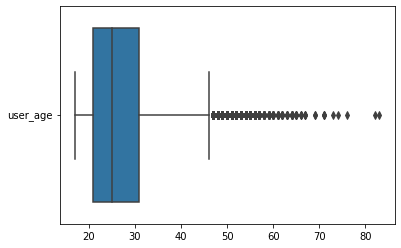

In [19]:
sns.boxplot(data=users_outliers[['user_age']],orient="h")

The boxplot suggests that the outliers are those whose age more than 45 years old. Just to be sure, let's check the the descriptive statistic for user_age

In [20]:
users_outliers.describe()

,user_age
count,14712.000000
mean,27.176591
std,8.552585
min,17.000000
25%,21.000000
50%,25.000000
75%,31.000000
max,83.000000


From the descriptive statistic above, we can see, that the youngest user is 17 years old and is old enough to start investing in mutual funds, and the maximum age here is 83 years old. 

For this part, it is wise not to do any outliers removal since it will ommit people who are older than 45 years old, thus loosing chances to see if anyone is older than 45 years old are potential candidates for government bonds offering

###Handling Typos

In [21]:
users_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             14712 non-null  object        
 1   reg_date            14712 non-null  datetime64[ns]
 2   user_gender         14712 non-null  object        
 3   user_age            14712 non-null  int64         
 4   user_occupation     14712 non-null  object        
 5   user_income_range   14712 non-null  object        
 6   referral_code_used  14712 non-null  object        
 7   user_income_source  14712 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 919.6+ KB


In [22]:
user_typo = users_outliers['user_occupation'].unique().tolist()
user_typo1 = users_outliers['user_income_range'].unique().tolist()
user_typo2 = users_outliers['user_income_source'].unique().tolist()
print(user_typo)
print(user_typo1)
print(user_typo2)

['Swasta', 'Others', 'IRT', 'PNS', 'Pengusaha', 'Pensiunan', 'TNI/Polisi', 'Guru', 'Pelajar']
['> Rp 500 Juta - 1 Miliar', '> Rp 50 Juta - 100 Juta', 'Rp 10 Juta - 50 Juta', '< 10 Juta', '> Rp 100 Juta - 500 Juta', '> Rp 1 Miliar']
['Gaji', 'Keuntungan Bisnis', 'Lainnya', 'Dari Orang Tua / Anak', 'Undian', 'Tabungan', 'Warisan', 'Hasil Investasi', 'Dari Suami / istri', 'Bunga Simpanan']


In [23]:
users_outliers['user_occupation'].replace(to_replace = ['Others'],
                          value = 'Lainnya', inplace=True)

In [24]:
user2=users_outliers.copy()

#Load Daily Transaction Dataset

##Data Cleaning

In [25]:
url_daily = 'https://drive.google.com/file/d/19YREbQxU7FaHo0wkxMvgmzjx0ZAOJRdy/view?usp=sharing'
path_daily = 'https://drive.google.com/uc?export=download&id='+url_daily.split('/')[-2]
daily = pd.read_csv(path_daily)

In [26]:
daily.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0


In [27]:
daily.shape

(158811, 14)

In [28]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

In [29]:
daily_col_change=daily.copy()

###Change Column Name

We will now rename the date into trans_date, which stands for transaction date (where user make purchase or sell their share of mutual funds)

In [30]:
daily_col_change.rename(columns = {'date':'trans_date'}, inplace = True)

In [31]:
daily_col_change.columns

Index(['user_id', 'trans_date', 'Saham_AUM', 'Saham_invested_amount',
       'Saham_transaction_amount', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pasar_Uang_transaction_amount',
       'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_transaction_amount', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_transaction_amount'],
      dtype='object')

In [32]:
daily_datatype=daily_col_change.copy()

###Change Data Type

Now we will convert the trans_date from object/string to datetime format and also convert user_id from integer to string

In [33]:
daily_datatype['trans_date']=pd.to_datetime(daily_datatype["trans_date"])
daily_datatype['user_id']=daily_datatype['user_id'].apply(str)

In [34]:
daily_datatype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   trans_date                           158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

###Check Duplicated Values

In [35]:
daily_datatype[daily_datatype[['user_id','trans_date']].duplicated()]

,user_id,trans_date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount


We can see that there is no duplicated values here, so the data is good

In [36]:
daily_na=daily_datatype.copy()

###Handling Missing Values

In [37]:
daily_na.isna().sum()

user_id                                     0
trans_date                                  0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

Na here doesn't mean missing values, but it means that there's no transaction taking place in this date for particular funds

In [38]:
daily_na['Saham_AUM'] = daily_na['Saham_AUM'].fillna(0)
daily_na['Saham_invested_amount'] = daily_na['Saham_invested_amount'].fillna(0)
daily_na['Saham_transaction_amount'] = daily_na['Saham_transaction_amount'].fillna(0)
daily_na['Pasar_Uang_AUM'] = daily_na['Pasar_Uang_AUM'].fillna(0)
daily_na['Pasar_Uang_invested_amount'] = daily_na['Pasar_Uang_invested_amount'].fillna(0)
daily_na['Pasar_Uang_transaction_amount']=daily_na['Pasar_Uang_transaction_amount'].fillna(0)
daily_na['Pendapatan_Tetap_AUM'] = daily_na['Pendapatan_Tetap_AUM'].fillna(0)
daily_na['Pendapatan_Tetap_invested_amount'] = daily_na['Pendapatan_Tetap_invested_amount'].fillna(0)
daily_na['Pendapatan_Tetap_transaction_amount'] = daily_na['Pendapatan_Tetap_transaction_amount'].fillna(0)
daily_na['Campuran_AUM']=daily_na['Campuran_AUM'].fillna(0)
daily_na['Campuran_invested_amount'] = daily_na['Campuran_invested_amount'].fillna(0)
daily_na['Campuran_transaction_amount'] = daily_na['Campuran_transaction_amount'].fillna(0)

In [39]:
daily_na.isna().sum()

user_id                                0
trans_date                             0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transaction_amount            0
dtype: int64

In [40]:
daily_outliers=daily_na.copy()

###Handling outliers

In [41]:
daily_outliers.shape

(158811, 14)

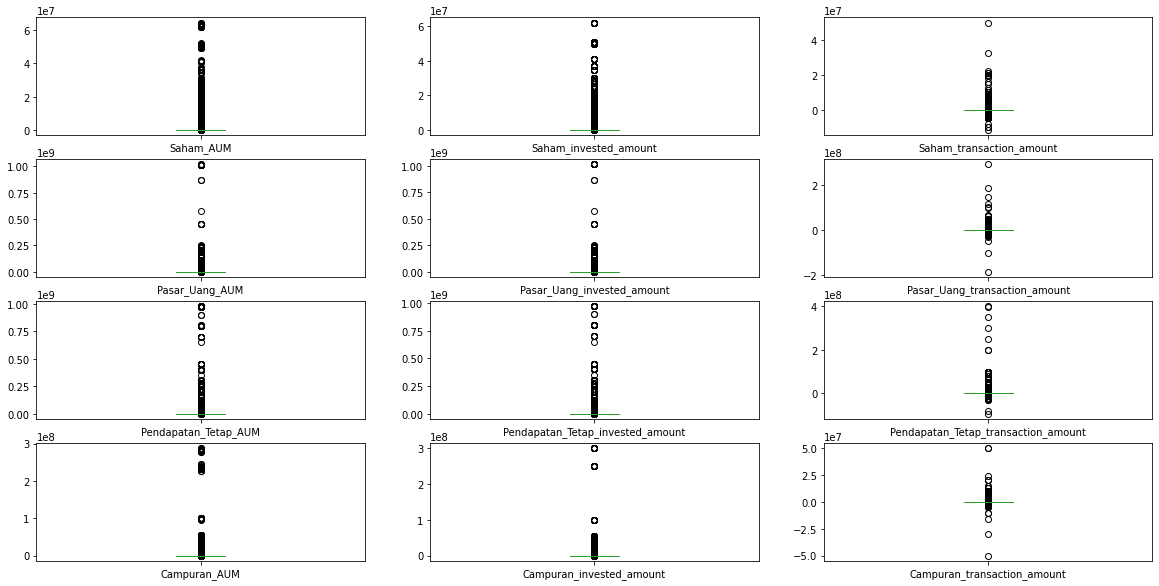

In [42]:
#Checking Outlier
num_col = ['Saham_AUM','Saham_invested_amount','Saham_transaction_amount',
        'Pasar_Uang_AUM','Pasar_Uang_invested_amount',
        'Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM',
        'Pendapatan_Tetap_invested_amount',
        'Pendapatan_Tetap_transaction_amount','Campuran_AUM',
        'Campuran_invested_amount','Campuran_transaction_amount']
#Chart position and size
fig, axes = plt.subplots(nrows = 4,
                         ncols = 3,
                         figsize = (20,10))
#for 0 (i), Income
for i,el in enumerate(num_col):
  a= daily_outliers.boxplot(el, 
                             ax=axes.flatten()[i],
                             grid=False)
#Show the box plot
plt.show()

All the columns have outliers. The question would be, do we need to remove the outliers? Or, can we consider them not as outliers. Let's carefully scrutinize this. AUM is Asset Under Management, in the other words is how much our asset under the asset management in terms of market values. Say, that you invested in stock funds for Rp 1 Million. That means your asset under the asset management is Rp 1 Million, plus the growth (can be plus or minus depanding what's the stock price in the market is selling at given time), say is 10%, thus your AUM will be Rp 1,1 Million.
Invested amount, means how much money you invest into certain fund, while transaction amount is how much funds you buy (if positive) or sell (if negative) in any given day.
By looking at these fact, I would say that there always possibility that there is person who has high AUM (possibly he invests funds for very long time), people who buys a lot of funds (for pension) and high number people who buy funds (topping up, each week/month) and sell their fund (if a person needs to take profit). For this case, I would say that I'd like to think of them not as outliers. 

**So, in this case we will keep data tagged as outliers **


In [43]:
daily2=daily_outliers.copy()

# Merging Dataset

In [44]:
df = pd.merge(user2, daily2, on="user_id")

In [45]:
df.head()

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-17,189109.0,...,0.0,40012.0,40000.0,0.0,270084.0,270000.0,0.0,0.0,0.0,0.0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-18,188542.0,...,0.0,40022.0,40000.0,0.0,270399.0,270000.0,0.0,0.0,0.0,0.0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-19,185228.0,...,0.0,40028.0,40000.0,0.0,270426.0,270000.0,0.0,0.0,0.0,0.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-20,184354.0,...,0.0,40034.0,40000.0,0.0,270175.0,270000.0,0.0,0.0,0.0,0.0
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-23,186365.0,...,0.0,40047.0,40000.0,0.0,270315.0,270000.0,0.0,0.0,0.0,0.0


In [46]:
df.shape

(158811, 21)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   reg_date                             158811 non-null  datetime64[ns]
 2   user_gender                          158811 non-null  object        
 3   user_age                             158811 non-null  int64         
 4   user_occupation                      158811 non-null  object        
 5   user_income_range                    158811 non-null  object        
 6   referral_code_used                   158811 non-null  object        
 7   user_income_source                   158811 non-null  object        
 8   trans_date                           158811 non-null  datetime64[ns]
 9   Saham_AUM                            158811 non-null  float64       
 

In [48]:
df.isna().sum()

user_id                                0
reg_date                               0
user_gender                            0
user_age                               0
user_occupation                        0
user_income_range                      0
referral_code_used                     0
user_income_source                     0
trans_date                             0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transaction_amount            0
dtype: int64

##Handling duplicated values

In [49]:
df[df[['user_id','trans_date']].duplicated()]

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount


In [50]:
dfedit=df.copy()

# Dataset Transformation

In this section we will do dataset transformation by adding columns of each funds call buy (when user buy funds) and sell (when user sell their funds). We will also add column profit_loss for each catagory to estimate the profit or loss of each buy and sell based on the market value of the funds. We also adding new columns of total aum (displaying of total AUM of each user), total invested amount (displaying of total invested amount of user) and column loss/profit

In [51]:
dfedit['Buy_saham']=dfedit['Saham_transaction_amount'].where(dfedit['Saham_transaction_amount'] > 0)
dfedit['Sell_saham']=dfedit['Saham_transaction_amount'].where(dfedit['Saham_transaction_amount'] < 0)
dfedit['Profit_Loss_saham']=dfedit['Saham_AUM']-dfedit['Saham_invested_amount']
dfedit['Buy_Pasar_Uang']=dfedit['Pasar_Uang_transaction_amount'].where(dfedit['Pasar_Uang_transaction_amount'] > 0)
dfedit['Sell_Pasar_Uang']=dfedit['Pasar_Uang_transaction_amount'].where(dfedit['Pasar_Uang_transaction_amount'] < 0)
dfedit['Profit_Loss_Pasar_Uang']=dfedit['Pasar_Uang_AUM']-dfedit['Pasar_Uang_invested_amount']
dfedit['Buy_Pendapatan_Tetap']=dfedit['Pendapatan_Tetap_transaction_amount'].where(dfedit['Pendapatan_Tetap_transaction_amount'] > 0)
dfedit['Sell_Pendapatan_Tetap']=dfedit['Pendapatan_Tetap_transaction_amount'].where(dfedit['Pendapatan_Tetap_transaction_amount'] < 0)
dfedit['Profit_Loss_Pendapatan_Tetap']=dfedit['Pendapatan_Tetap_AUM']-dfedit['Pendapatan_Tetap_invested_amount']
dfedit['Buy_Campuran']=dfedit['Campuran_transaction_amount'].where(dfedit['Campuran_transaction_amount'] > 0)
dfedit['Sell_Campuran']=dfedit['Campuran_transaction_amount'].where(dfedit['Campuran_transaction_amount'] < 0)
dfedit['Profit_Loss_Campuran']=dfedit['Campuran_AUM']-dfedit['Campuran_invested_amount']
dfedit['Total_AUM']=dfedit['Saham_AUM']+dfedit['Pasar_Uang_AUM']+dfedit['Pendapatan_Tetap_AUM']+dfedit['Campuran_AUM']
dfedit['Total_Invested_Amount']=dfedit['Saham_invested_amount']+dfedit['Pasar_Uang_invested_amount']+dfedit['Pendapatan_Tetap_invested_amount']+dfedit['Campuran_invested_amount']


In [52]:
dfedit

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Sell_Pasar_Uang,Profit_Loss_Pasar_Uang,Buy_Pendapatan_Tetap,Sell_Pendapatan_Tetap,Profit_Loss_Pendapatan_Tetap,Buy_Campuran,Sell_Campuran,Profit_Loss_Campuran,Total_AUM,Total_Invested_Amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-17,189109.0,...,NaN,12.0,NaN,NaN,84.0,NaN,NaN,0.0,499205.0,500000.0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-18,188542.0,...,NaN,22.0,NaN,NaN,399.0,NaN,NaN,0.0,498963.0,500000.0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-19,185228.0,...,NaN,28.0,NaN,NaN,426.0,NaN,NaN,0.0,495682.0,500000.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-20,184354.0,...,NaN,34.0,NaN,NaN,175.0,NaN,NaN,0.0,494563.0,500000.0
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-23,186365.0,...,NaN,47.0,NaN,NaN,315.0,NaN,NaN,0.0,496727.0,500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-24,9900685.0,...,NaN,12541.0,NaN,NaN,-10785.0,NaN,NaN,0.0,61002441.0,61100000.0
158807,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-27,9911149.0,...,NaN,16412.0,NaN,NaN,10237.0,NaN,NaN,0.0,61037798.0,61100000.0
158808,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-28,10018447.0,...,NaN,17871.0,NaN,NaN,13869.0,NaN,NaN,0.0,61150187.0,61100000.0
158809,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-29,20161402.0,...,NaN,19204.0,NaN,NaN,-1475.0,NaN,NaN,0.0,71279131.0,71100000.0


In [53]:
dfedit.columns.tolist()

['user_id',
 'reg_date',
 'user_gender',
 'user_age',
 'user_occupation',
 'user_income_range',
 'referral_code_used',
 'user_income_source',
 'trans_date',
 'Saham_AUM',
 'Saham_invested_amount',
 'Saham_transaction_amount',
 'Pasar_Uang_AUM',
 'Pasar_Uang_invested_amount',
 'Pasar_Uang_transaction_amount',
 'Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_invested_amount',
 'Pendapatan_Tetap_transaction_amount',
 'Campuran_AUM',
 'Campuran_invested_amount',
 'Campuran_transaction_amount',
 'Buy_saham',
 'Sell_saham',
 'Profit_Loss_saham',
 'Buy_Pasar_Uang',
 'Sell_Pasar_Uang',
 'Profit_Loss_Pasar_Uang',
 'Buy_Pendapatan_Tetap',
 'Sell_Pendapatan_Tetap',
 'Profit_Loss_Pendapatan_Tetap',
 'Buy_Campuran',
 'Sell_Campuran',
 'Profit_Loss_Campuran',
 'Total_AUM',
 'Total_Invested_Amount']

In [54]:
dfedit.isna().sum()

user_id                                     0
reg_date                                    0
user_gender                                 0
user_age                                    0
user_occupation                             0
user_income_range                           0
referral_code_used                          0
user_income_source                          0
trans_date                                  0
Saham_AUM                                   0
Saham_invested_amount                       0
Saham_transaction_amount                    0
Pasar_Uang_AUM                              0
Pasar_Uang_invested_amount                  0
Pasar_Uang_transaction_amount               0
Pendapatan_Tetap_AUM                        0
Pendapatan_Tetap_invested_amount            0
Pendapatan_Tetap_transaction_amount         0
Campuran_AUM                                0
Campuran_invested_amount                    0
Campuran_transaction_amount                 0
Buy_saham                         

In [55]:
dfedit['Buy_saham'] = dfedit['Buy_saham'].fillna(0)
dfedit['Sell_saham'] = dfedit['Sell_saham'].fillna(0)
dfedit['Buy_Pasar_Uang'] = dfedit['Buy_Pasar_Uang'].fillna(0)
dfedit['Sell_Pasar_Uang'] = dfedit['Buy_Pasar_Uang'].fillna(0)
dfedit['Buy_Pendapatan_Tetap'] = dfedit['Buy_Pendapatan_Tetap'].fillna(0)
dfedit['Sell_Pendapatan_Tetap'] = dfedit['Sell_Pendapatan_Tetap'].fillna(0)
dfedit['Buy_Campuran'] = dfedit['Buy_Campuran'].fillna(0)
dfedit['Sell_Campuran'] = dfedit['Sell_Campuran'].fillna(0)


In [56]:
dfedit.isna().sum()

user_id                                0
reg_date                               0
user_gender                            0
user_age                               0
user_occupation                        0
user_income_range                      0
referral_code_used                     0
user_income_source                     0
trans_date                             0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transaction_amount            0
Buy_saham                              0
Sell_saham                             0
Profit_Loss_saham                      0
Buy_Pasar_Uang  

##Dataset Transformation by Adding Another New Columns

In [57]:
dfedit['Profit_Loss_Total']=dfedit['Total_AUM']-dfedit['Total_Invested_Amount']
dfedit['Total_Buy']=dfedit['Buy_saham']+dfedit['Buy_Pasar_Uang']+dfedit['Buy_Pendapatan_Tetap']+dfedit['Buy_Campuran']
dfedit['Total_Sell']=dfedit['Sell_saham']+dfedit['Sell_Pasar_Uang']+dfedit['Sell_Campuran']+dfedit['Sell_Pendapatan_Tetap']


In [58]:
dfedit.isna().sum()

user_id                                0
reg_date                               0
user_gender                            0
user_age                               0
user_occupation                        0
user_income_range                      0
referral_code_used                     0
user_income_source                     0
trans_date                             0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transaction_amount            0
Buy_saham                              0
Sell_saham                             0
Profit_Loss_saham                      0
Buy_Pasar_Uang  

##Rearranging The Columns

In [59]:
dfedit2=dfedit[['user_id','reg_date','user_gender','user_age',
               'user_occupation','user_income_range','referral_code_used',
               'user_income_source','trans_date','Saham_AUM','Saham_invested_amount',
               'Buy_saham','Sell_saham','Profit_Loss_saham','Pasar_Uang_AUM',
                'Pasar_Uang_invested_amount','Buy_Pasar_Uang','Sell_Pasar_Uang',
                'Profit_Loss_Pasar_Uang','Pendapatan_Tetap_AUM',
                'Pendapatan_Tetap_invested_amount','Buy_Pendapatan_Tetap',
                'Sell_Pendapatan_Tetap','Profit_Loss_Pendapatan_Tetap',
                'Campuran_AUM','Campuran_invested_amount',
                'Buy_Campuran','Sell_Campuran','Profit_Loss_Campuran','Total_AUM',
                'Total_Invested_Amount','Profit_Loss_Total','Total_Buy','Total_Sell']]

In [60]:
dfedit2.columns.tolist()

['user_id',
 'reg_date',
 'user_gender',
 'user_age',
 'user_occupation',
 'user_income_range',
 'referral_code_used',
 'user_income_source',
 'trans_date',
 'Saham_AUM',
 'Saham_invested_amount',
 'Buy_saham',
 'Sell_saham',
 'Profit_Loss_saham',
 'Pasar_Uang_AUM',
 'Pasar_Uang_invested_amount',
 'Buy_Pasar_Uang',
 'Sell_Pasar_Uang',
 'Profit_Loss_Pasar_Uang',
 'Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_invested_amount',
 'Buy_Pendapatan_Tetap',
 'Sell_Pendapatan_Tetap',
 'Profit_Loss_Pendapatan_Tetap',
 'Campuran_AUM',
 'Campuran_invested_amount',
 'Buy_Campuran',
 'Sell_Campuran',
 'Profit_Loss_Campuran',
 'Total_AUM',
 'Total_Invested_Amount',
 'Profit_Loss_Total',
 'Total_Buy',
 'Total_Sell']

In [61]:
dfedit3=dfedit2.copy()

##Monthly AUM Per User

In [62]:
import datetime
dfedit3['Trans_Month'] = dfedit3['trans_date'].dt.strftime('%m')
dfedit3['Trans_Year'] = dfedit3['trans_date'].dt.strftime('%Y')
dfedit3['Trans_Day'] = dfedit3['trans_date'].dt.strftime('%d')
dfedit3

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Sell_Campuran,Profit_Loss_Campuran,Total_AUM,Total_Invested_Amount,Profit_Loss_Total,Total_Buy,Total_Sell,Trans_Month,Trans_Year,Trans_Day
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-17,189109.0,...,0.0,0.0,499205.0,500000.0,-795.0,0.0,0.0,08,2021,17
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-18,188542.0,...,0.0,0.0,498963.0,500000.0,-1037.0,0.0,0.0,08,2021,18
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-19,185228.0,...,0.0,0.0,495682.0,500000.0,-4318.0,0.0,0.0,08,2021,19
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-20,184354.0,...,0.0,0.0,494563.0,500000.0,-5437.0,0.0,0.0,08,2021,20
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-23,186365.0,...,0.0,0.0,496727.0,500000.0,-3273.0,0.0,0.0,08,2021,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-24,9900685.0,...,0.0,0.0,61002441.0,61100000.0,-97559.0,0.0,0.0,09,2021,24
158807,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-27,9911149.0,...,0.0,0.0,61037798.0,61100000.0,-62202.0,0.0,0.0,09,2021,27
158808,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-28,10018447.0,...,0.0,0.0,61150187.0,61100000.0,50187.0,0.0,0.0,09,2021,28
158809,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-29,20161402.0,...,0.0,0.0,71279131.0,71100000.0,179131.0,10000000.0,0.0,09,2021,29


In [63]:
AUM_month = dfedit3.groupby(['Trans_Year','Trans_Month','user_id','user_age','user_occupation','user_income_range'])[['Total_AUM']].agg('mean').reset_index().sort_values(by=['Trans_Month'], ascending=True)
AUM_month.head()

,Trans_Year,Trans_Month,user_id,user_age,user_occupation,user_income_range,Total_AUM
0,2021,08,1004326,30,Pelajar,> Rp 50 Juta - 100 Juta,200702.222222
2045,2021,08,3836323,32,Swasta,> Rp 100 Juta - 500 Juta,144837.333333
2046,2021,08,3836434,19,Pelajar,< 10 Juta,10008.833333
2047,2021,08,3836447,36,Swasta,< 10 Juta,801988.000000
2048,2021,08,3836514,21,Pelajar,< 10 Juta,100115.777778


Now that we can see, that there's something off. To start with, is it normal to have a 30 years old student?. My argument is that more than 30 years old student could be a graduate or even PHD student. So to see how many cases like this we will go back to our dfedit3 to see similar cases

In [64]:
dfedit3filter=dfedit3[((dfedit3['user_age'] >= 30) & (dfedit3['user_occupation'] == 'Pelajar'))] 

In [65]:
dfedit3filter

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Sell_Campuran,Profit_Loss_Campuran,Total_AUM,Total_Invested_Amount,Profit_Loss_Total,Total_Buy,Total_Sell,Trans_Month,Trans_Year,Trans_Day
119492,964972,2021-09-06 02:20:17,Male,30,Pelajar,< 10 Juta,not used,Lainnya,2021-09-27,1005767.0,...,0.0,0.0,1005767.0,1000000.0,5767.0,0.0,0.0,09,2021,27
119493,964972,2021-09-06 02:20:17,Male,30,Pelajar,< 10 Juta,not used,Lainnya,2021-09-28,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1000000.0,09,2021,28
119494,964972,2021-09-06 02:20:17,Male,30,Pelajar,< 10 Juta,not used,Lainnya,2021-09-29,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09,2021,29
119495,964972,2021-09-06 02:20:17,Male,30,Pelajar,< 10 Juta,not used,Lainnya,2021-09-30,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09,2021,30
119591,942445,2021-08-14 00:12:36,Female,30,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-01,29775.0,...,0.0,0.0,99792.0,100000.0,-208.0,0.0,0.0,09,2021,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151705,3758625,2021-08-05 13:19:18,Female,42,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-24,366205.0,...,0.0,0.0,1999082.0,2000000.0,-918.0,0.0,0.0,09,2021,24
151706,3758625,2021-08-05 13:19:18,Female,42,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-27,364265.0,...,0.0,0.0,1998146.0,2000000.0,-1854.0,0.0,0.0,09,2021,27
151707,3758625,2021-08-05 13:19:18,Female,42,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-28,369086.0,...,0.0,0.0,2003119.0,2000000.0,3119.0,0.0,0.0,09,2021,28
151708,3758625,2021-08-05 13:19:18,Female,42,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-29,369859.0,...,0.0,0.0,2003051.0,2000000.0,3051.0,0.0,0.0,09,2021,29


As we can see that there are 3660 return values with over 30 years old student. But we can also considered that those 3660 students who are more than 30 years old can be graduate student (S2) and phd candidates. So, we'll leave as is

##Monthly Invested Amount per User

In [66]:
inv_month = dfedit3.groupby(['Trans_Year','Trans_Month','user_id','user_age','user_occupation','user_income_range'])[['Total_Invested_Amount']].agg('mean').reset_index().sort_values(by=['Trans_Month'], ascending=True)
inv_month.head()

,Trans_Year,Trans_Month,user_id,user_age,user_occupation,user_income_range,Total_Invested_Amount
0,2021,08,1004326,30,Pelajar,> Rp 50 Juta - 100 Juta,200000.000000
2045,2021,08,3836323,32,Swasta,> Rp 100 Juta - 500 Juta,144444.444444
2046,2021,08,3836434,19,Pelajar,< 10 Juta,10000.000000
2047,2021,08,3836447,36,Swasta,< 10 Juta,800000.000000
2048,2021,08,3836514,21,Pelajar,< 10 Juta,100000.000000


##Monthly Total Buy Transaction per User

In [67]:
buy_month = dfedit3.groupby(['Trans_Year','Trans_Month','user_id','user_age','user_occupation','user_income_range'])[['Total_Buy']].agg('sum').reset_index().sort_values(by=['Trans_Month'], ascending=True)
buy_month.head()

,Trans_Year,Trans_Month,user_id,user_age,user_occupation,user_income_range,Total_Buy
0,2021,08,1004326,30,Pelajar,> Rp 50 Juta - 100 Juta,0.0
2045,2021,08,3836323,32,Swasta,> Rp 100 Juta - 500 Juta,200000.0
2046,2021,08,3836434,19,Pelajar,< 10 Juta,0.0
2047,2021,08,3836447,36,Swasta,< 10 Juta,0.0
2048,2021,08,3836514,21,Pelajar,< 10 Juta,0.0


##Monthly Total Sell Transaction per User

In [68]:
sell_month = dfedit3.groupby(['Trans_Year','Trans_Month','user_id','user_age','user_occupation','user_income_range'])[['Total_Sell']].agg('sum').reset_index().sort_values(by=['Trans_Month'], ascending=True)
sell_month.head(100)

,Trans_Year,Trans_Month,user_id,user_age,user_occupation,user_income_range,Total_Sell
0,2021,08,1004326,30,Pelajar,> Rp 50 Juta - 100 Juta,0.0
2045,2021,08,3836323,32,Swasta,> Rp 100 Juta - 500 Juta,200000.0
2046,2021,08,3836434,19,Pelajar,< 10 Juta,0.0
2047,2021,08,3836447,36,Swasta,< 10 Juta,0.0
2048,2021,08,3836514,21,Pelajar,< 10 Juta,0.0
...,...,...,...,...,...,...,...
2019,2021,08,3834121,21,Pelajar,< 10 Juta,0.0
2017,2021,08,3834081,29,IRT,Rp 10 Juta - 50 Juta,0.0
1949,2021,08,3828729,25,Swasta,< 10 Juta,-100000.0
1950,2021,08,3828760,18,Pelajar,< 10 Juta,0.0


##Changing Values of Column

In [69]:
dfedit3['user_occupation']=dfedit3['user_occupation'].replace(['TNI/Polisi','Pensiunan'],['PNS','Lainnya'])

# Explarotry Data Analysis (EDA)

Descriptive Statistic

In [70]:
dfedit3.describe(include='all')

<ipython-input-70-eb36d1020f5d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfedit3.describe(include='all')


,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Sell_Campuran,Profit_Loss_Campuran,Total_AUM,Total_Invested_Amount,Profit_Loss_Total,Total_Buy,Total_Sell,Trans_Month,Trans_Year,Trans_Day
count,158811,158811,158811,158811.000000,158811,158811,158811,158811,158811,1.588110e+05,...,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,158811,158811,158811
unique,8277,6581,2,NaN,7,6,2,10,42,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,31
top,3740513,2021-08-02 13:38:02,Male,NaN,Pelajar,< 10 Juta,not used,Gaji,2021-09-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09,2021,30
freq,42,164,97149,NaN,88865,68500,107440,99611,8277,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127766,158811,11203
first,NaN,2021-08-01 00:11:14,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-04 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-09-28 13:20:00,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,27.201774,NaN,NaN,NaN,NaN,NaN,2.974978e+05,...,-1.118802e+03,-9.991525e+03,2.439325e+06,2.442450e+06,-3.125386e+03,7.807123e+04,1.458687e+04,NaN,NaN,NaN
std,NaN,NaN,NaN,8.579667,NaN,NaN,NaN,NaN,NaN,1.770372e+06,...,1.593217e+05,2.649778e+05,2.494119e+07,2.490078e+07,2.869483e+05,2.723035e+06,1.239153e+06,NaN,NaN,NaN
min,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,-5.000000e+07,-2.478103e+07,0.000000e+00,0.000000e+00,-2.478103e+07,0.000000e+00,-9.271240e+07,NaN,NaN,NaN
25%,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000e+00,0.000000e+00,1.001500e+04,1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN


##Number of users

In [71]:
len(dfedit3['user_id'].unique())

8277

There are 8277 users registered in our Asset Management

In [72]:
dfuser=dfedit3.copy()

##Gender Group

In [73]:
print (dfuser.groupby('user_gender')['user_id'].nunique())

user_gender
Female    3101
Male      5176
Name: user_id, dtype: int64


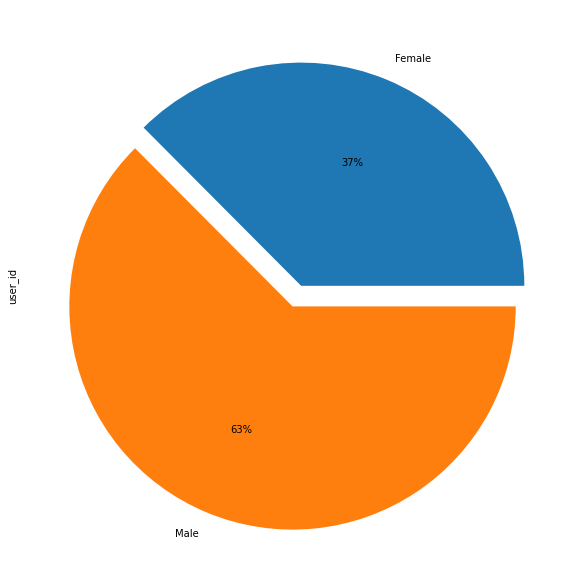

In [74]:
dfuser.groupby('user_gender')['user_id'].nunique().plot.pie(explode=[0,0.1],figsize=(10,20),autopct='%1.0f%%')
plt.show()

63% of clients in our Asset Mangement are Male, while female users make up 37% of total users

##Joining Through Refferal Code

In [75]:
print (dfuser.groupby('referral_code_used')['user_id'].nunique())

referral_code_used
not used         5322
used referral    2955
Name: user_id, dtype: int64


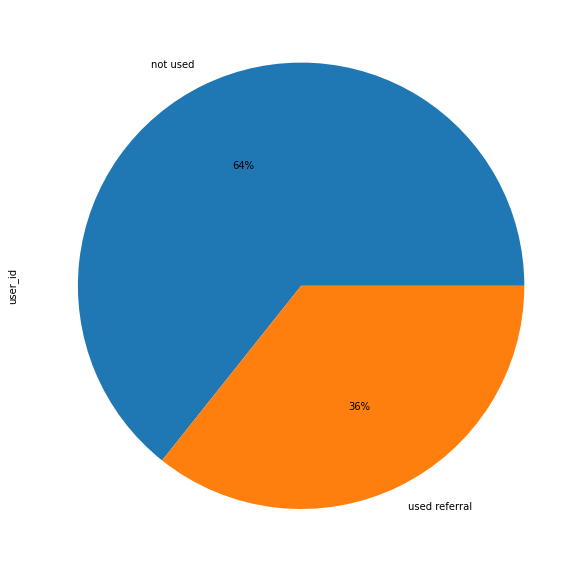

In [76]:
dfuser.groupby('referral_code_used')['user_id'].nunique().plot.pie(figsize=(10,20),autopct='%1.0f%%')
plt.show()

More than 60% of registered user, registered without referral. This can be a follow up to marketing team, to promote the asset management using referral by incorporating previous user/registered users

##User Ocupation Background

In [77]:
print (dfuser.groupby('user_occupation')['user_id'].nunique())

user_occupation
Guru           60
IRT           478
Lainnya       932
PNS           142
Pelajar      4473
Pengusaha     324
Swasta       1868
Name: user_id, dtype: int64


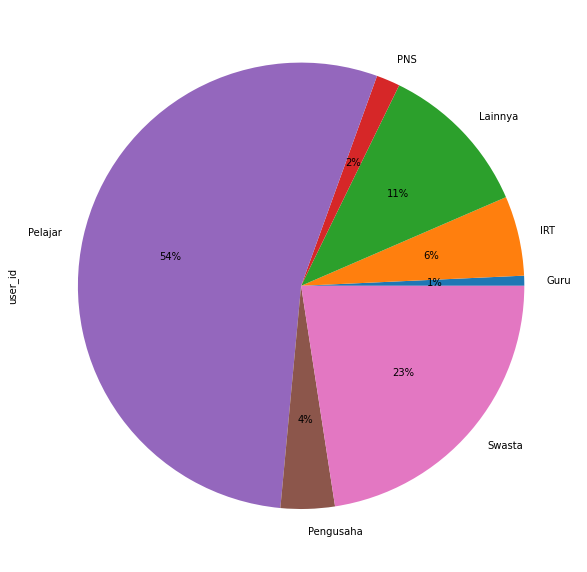

In [78]:
dfuser.groupby('user_occupation')['user_id'].nunique().plot.pie(figsize=(10,20),autopct='%1.0f%%')
plt.show()

Students takes the biggest portion in our clients, suggesting that many students (from High school to graduate students), really consider investing in mutual funds for their future financial plan

##User Income Range

In [79]:
print (dfuser.groupby('user_income_range')['user_id'].nunique())

user_income_range
< 10 Juta                   3527
> Rp 1 Miliar                 16
> Rp 100 Juta - 500 Juta     637
> Rp 50 Juta - 100 Juta     1343
> Rp 500 Juta - 1 Miliar      48
Rp 10 Juta - 50 Juta        2706
Name: user_id, dtype: int64


In [80]:
dfcplot=dfuser.groupby('user_income_range')['user_id'].nunique().sort_values(ascending=False)


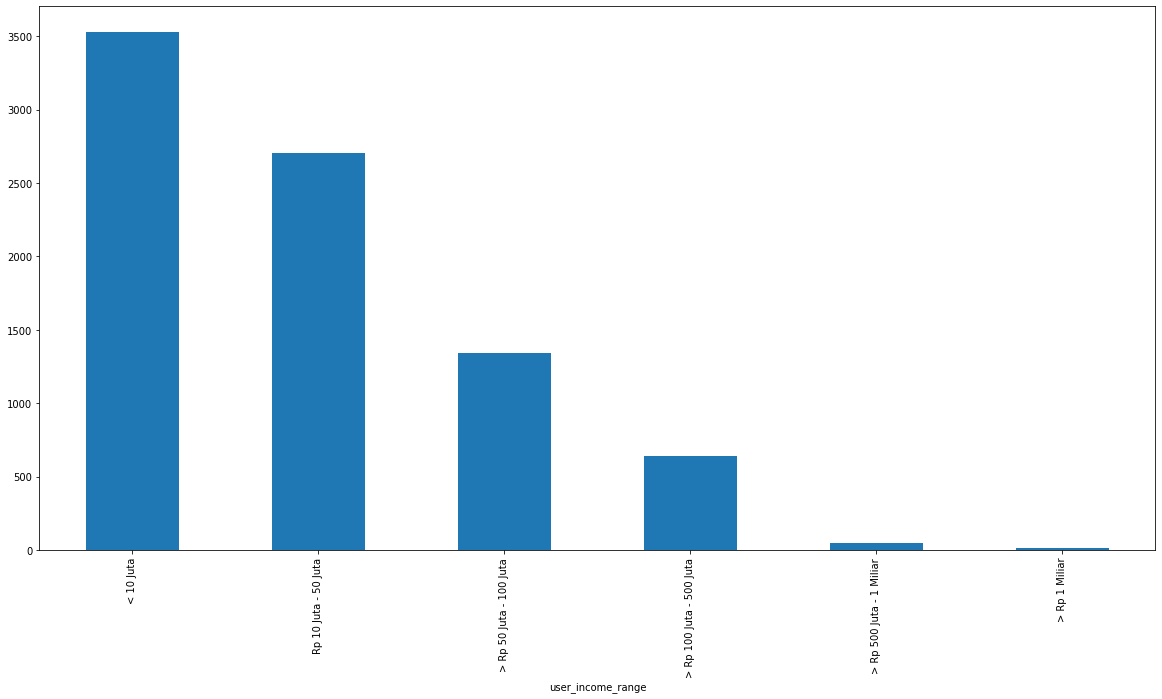

In [81]:
dfcplot.plot.bar(figsize=(20,10))

Many clients registered in our Asset Management are those with salary less than Rp 10 Million. This can be seen as opportunity to offer them low cost funds with minimum risk such as Market Money funds and  Fix income funds

##User Age Distribution

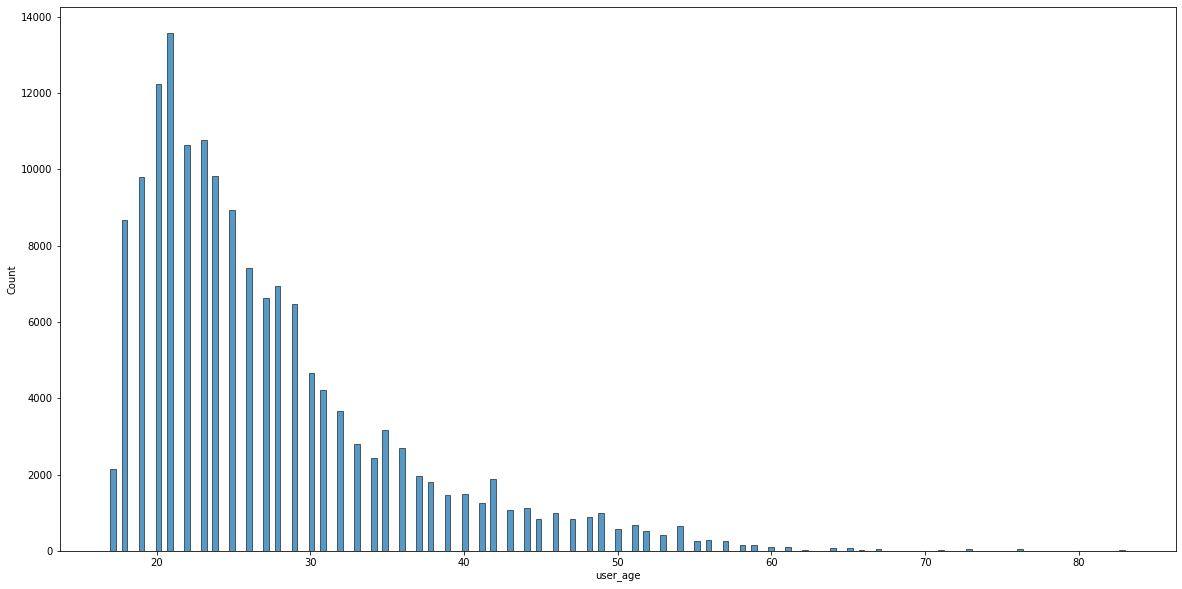

In [82]:
plt.figure(figsize = (20, 10))
sns.histplot(x = 'user_age', data = dfuser )

The clients age distribution show that mostly the clients are in the range of 20 to 30 years old, with very small but exist, numbers of clients who are over 50 years old. 

##How Many User Make Purchases On A Single Day

In [83]:
dfu=dfedit3.copy()
dfu

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Sell_Campuran,Profit_Loss_Campuran,Total_AUM,Total_Invested_Amount,Profit_Loss_Total,Total_Buy,Total_Sell,Trans_Month,Trans_Year,Trans_Day
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-17,189109.0,...,0.0,0.0,499205.0,500000.0,-795.0,0.0,0.0,08,2021,17
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-18,188542.0,...,0.0,0.0,498963.0,500000.0,-1037.0,0.0,0.0,08,2021,18
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-19,185228.0,...,0.0,0.0,495682.0,500000.0,-4318.0,0.0,0.0,08,2021,19
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-20,184354.0,...,0.0,0.0,494563.0,500000.0,-5437.0,0.0,0.0,08,2021,20
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-23,186365.0,...,0.0,0.0,496727.0,500000.0,-3273.0,0.0,0.0,08,2021,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-24,9900685.0,...,0.0,0.0,61002441.0,61100000.0,-97559.0,0.0,0.0,09,2021,24
158807,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-27,9911149.0,...,0.0,0.0,61037798.0,61100000.0,-62202.0,0.0,0.0,09,2021,27
158808,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-28,10018447.0,...,0.0,0.0,61150187.0,61100000.0,50187.0,0.0,0.0,09,2021,28
158809,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-29,20161402.0,...,0.0,0.0,71279131.0,71100000.0,179131.0,10000000.0,0.0,09,2021,29


In [84]:
dfu.loc[dfu['user_age'].between(16,26), 'age_group'] = '17-25'
dfu.loc[dfu['user_age'].between(25,36), 'age_group'] = '26-35'
dfu.loc[dfu['user_age'].between(35,46), 'age_group'] = '36-46'
dfu.loc[dfu['user_age'].between(45,56), 'age_group'] = '46-55'
dfu.loc[dfu['user_age']>56, 'age_group'] = '>56'
dfu

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Profit_Loss_Campuran,Total_AUM,Total_Invested_Amount,Profit_Loss_Total,Total_Buy,Total_Sell,Trans_Month,Trans_Year,Trans_Day,age_group
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-17,189109.0,...,0.0,499205.0,500000.0,-795.0,0.0,0.0,08,2021,17,46-55
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-18,188542.0,...,0.0,498963.0,500000.0,-1037.0,0.0,0.0,08,2021,18,46-55
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-19,185228.0,...,0.0,495682.0,500000.0,-4318.0,0.0,0.0,08,2021,19,46-55
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-20,184354.0,...,0.0,494563.0,500000.0,-5437.0,0.0,0.0,08,2021,20,46-55
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-23,186365.0,...,0.0,496727.0,500000.0,-3273.0,0.0,0.0,08,2021,23,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-24,9900685.0,...,0.0,61002441.0,61100000.0,-97559.0,0.0,0.0,09,2021,24,46-55
158807,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-27,9911149.0,...,0.0,61037798.0,61100000.0,-62202.0,0.0,0.0,09,2021,27,46-55
158808,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-28,10018447.0,...,0.0,61150187.0,61100000.0,50187.0,0.0,0.0,09,2021,28,46-55
158809,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used,Keuntungan Bisnis,2021-09-29,20161402.0,...,0.0,71279131.0,71100000.0,179131.0,10000000.0,0.0,09,2021,29,46-55


In [85]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           158811 non-null  object        
 1   reg_date                          158811 non-null  datetime64[ns]
 2   user_gender                       158811 non-null  object        
 3   user_age                          158811 non-null  int64         
 4   user_occupation                   158811 non-null  object        
 5   user_income_range                 158811 non-null  object        
 6   referral_code_used                158811 non-null  object        
 7   user_income_source                158811 non-null  object        
 8   trans_date                        158811 non-null  datetime64[ns]
 9   Saham_AUM                         158811 non-null  float64       
 10  Saham_invested_amount           

In [86]:
dfubuy=dfu[['trans_date','Trans_Day','Trans_Month','Trans_Year','user_id','user_gender','user_age','age_group','user_occupation','user_income_range',
            'Buy_saham','Buy_Pasar_Uang','Buy_Campuran'
            ,'Buy_Pendapatan_Tetap','Total_Buy']]
dfubuy.head()

,trans_date,Trans_Day,Trans_Month,Trans_Year,user_id,user_gender,user_age,age_group,user_occupation,user_income_range,Buy_saham,Buy_Pasar_Uang,Buy_Campuran,Buy_Pendapatan_Tetap,Total_Buy
0,2021-08-17,17,08,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,0.0
1,2021-08-18,18,08,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,0.0
2,2021-08-19,19,08,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,0.0
3,2021-08-20,20,08,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,0.0
4,2021-08-23,23,08,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,0.0


In [87]:
dfubuy1=dfubuy[dfubuy['Total_Buy']!=0]
dfubuy1

,trans_date,Trans_Day,Trans_Month,Trans_Year,user_id,user_gender,user_age,age_group,user_occupation,user_income_range,Buy_saham,Buy_Pasar_Uang,Buy_Campuran,Buy_Pendapatan_Tetap,Total_Buy
22,2021-09-16,16,09,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,100000.0,0.0,0.0,0.0,100000.0
52,2021-09-15,15,09,2021,3802293,Female,47,46-55,PNS,> Rp 500 Juta - 1 Miliar,2320000.0,350000.0,0.0,830000.0,3500000.0
58,2021-09-23,23,09,2021,3802293,Female,47,46-55,PNS,> Rp 500 Juta - 1 Miliar,3300000.0,500000.0,0.0,1200000.0,5000000.0
70,2021-09-30,30,09,2021,3049927,Male,53,46-55,Swasta,< 10 Juta,0.0,0.0,149000.0,0.0,149000.0
79,2021-09-17,17,09,2021,3783302,Male,57,>56,Swasta,> Rp 50 Juta - 100 Juta,370000.0,100000.0,0.0,530000.0,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158739,2021-08-31,31,08,2021,3670811,Male,49,46-55,Swasta,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,25000.0,25000.0
158758,2021-09-27,27,09,2021,3670811,Male,49,46-55,Swasta,> Rp 50 Juta - 100 Juta,100000.0,0.0,0.0,0.0,100000.0
158767,2021-08-24,24,08,2021,3812221,Male,49,46-55,PNS,> Rp 100 Juta - 500 Juta,80000.0,10000.0,0.0,60000.0,150000.0
158801,2021-09-17,17,09,2021,3881981,Female,49,46-55,Pengusaha,> Rp 100 Juta - 500 Juta,0.0,10000000.0,0.0,40000000.0,50000000.0


In [88]:
grouping=dfubuy1.groupby(['trans_date'])['user_id'].count()

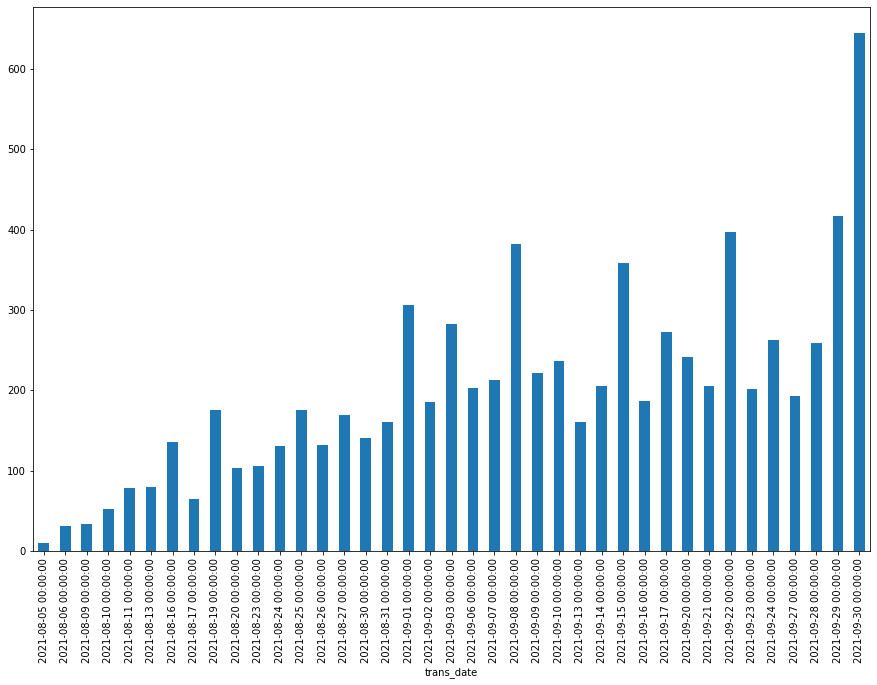

In [89]:
grouping.plot.bar(figsize=(15,10))

##Is There A different behaviour in making purchase for male user vs female?

In [90]:
dfgender=dfubuy1.groupby(['trans_date','user_gender']).count()['user_id']
dfgender

trans_date  user_gender
2021-08-05  Female           5
            Male             5
2021-08-06  Female          12
            Male            19
2021-08-09  Female          12
                          ... 
2021-09-28  Male           140
2021-09-29  Female         188
            Male           229
2021-09-30  Female         284
            Male           361
Name: user_id, Length: 78, dtype: int64

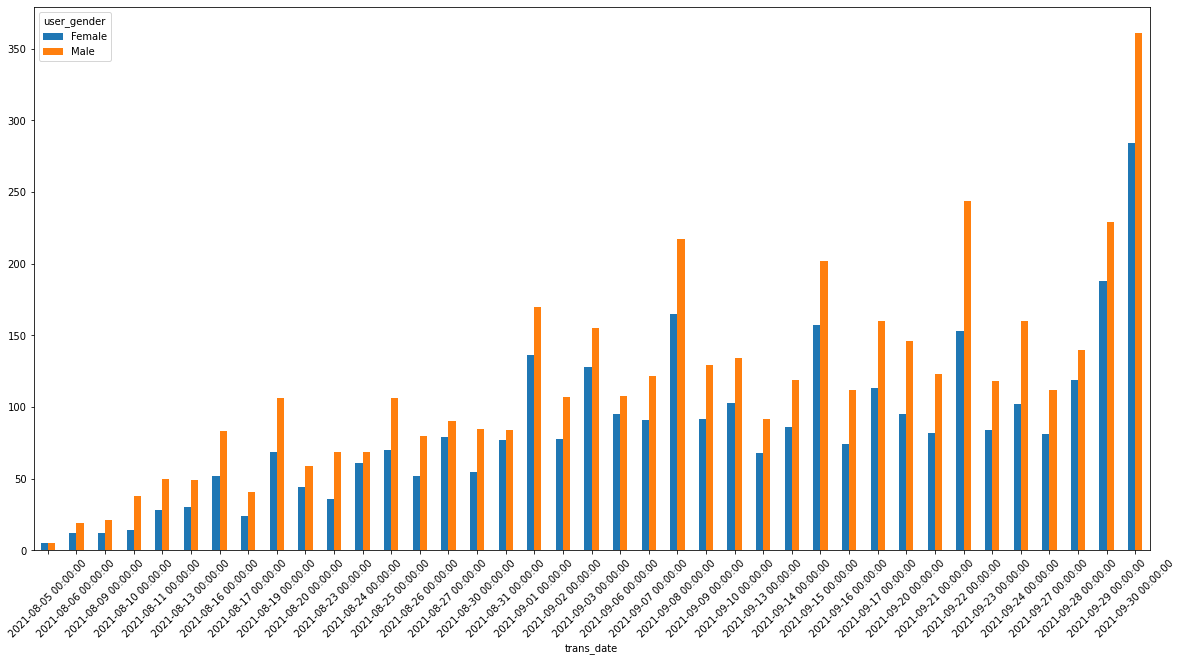

In [91]:
dfgender.unstack().plot.bar(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

We can see toward the end of August 2021, that there are less female user make purchases while male user in the same period increase their purchases from the previous period


##Is there differences in behavior pattern in buying funds based on the occupation?

In [92]:
dfoc=dfubuy1.groupby(['trans_date','user_occupation']).count()['user_id']
dfoc

trans_date  user_occupation
2021-08-05  Lainnya              1
            Pelajar              5
            Swasta               4
2021-08-06  IRT                  1
            Lainnya              5
                              ... 
2021-09-30  Lainnya             70
            PNS                 13
            Pelajar            325
            Pengusaha           26
            Swasta             175
Name: user_id, Length: 258, dtype: int64

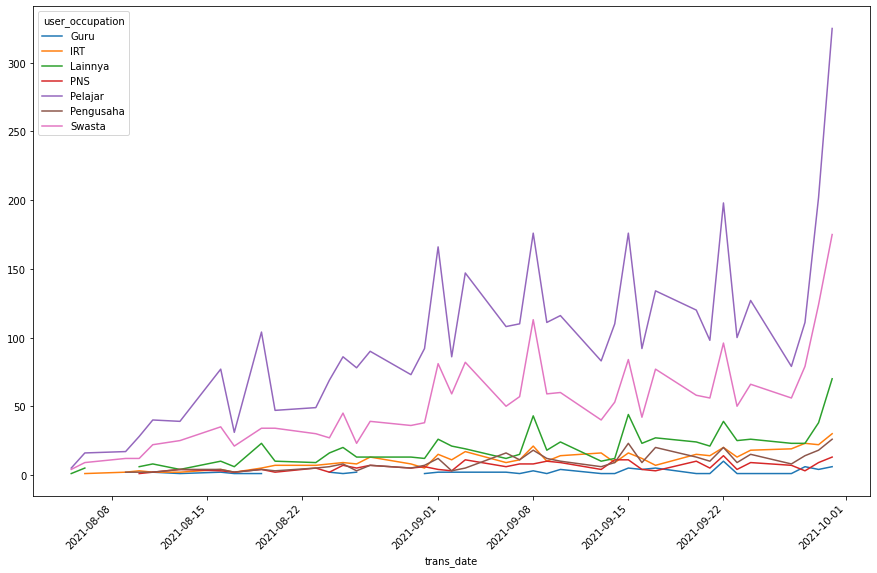

In [93]:
dfoc.unstack().plot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

##Income Range in Transaction Behaviour

In [94]:
dfsal=dfubuy1.groupby(['trans_date','user_income_range']).count()['user_id']
dfsal

trans_date  user_income_range       
2021-08-05  < 10 Juta                     4
            > Rp 50 Juta - 100 Juta       3
            Rp 10 Juta - 50 Juta          3
2021-08-06  < 10 Juta                    12
            > Rp 100 Juta - 500 Juta      3
                                       ... 
2021-09-30  > Rp 1 Miliar                 1
            > Rp 100 Juta - 500 Juta     87
            > Rp 50 Juta - 100 Juta     127
            > Rp 500 Juta - 1 Miliar     15
            Rp 10 Juta - 50 Juta        214
Name: user_id, Length: 205, dtype: int64

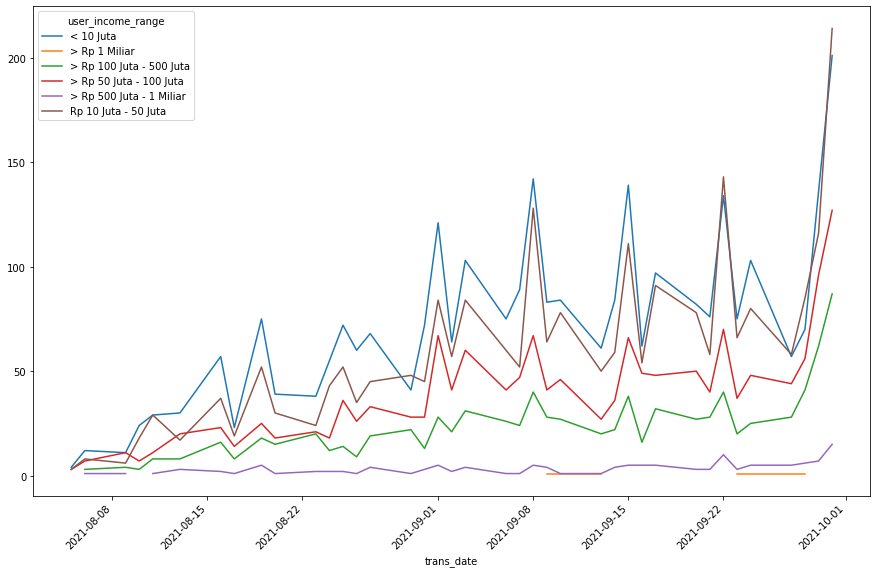

In [95]:
dfsal.unstack().plot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

In [96]:
dfage=dfubuy1.groupby(['trans_date','age_group']).count()['user_id']
dfage

trans_date  age_group
2021-08-05  17-25          3
            26-35          3
            36-46          1
            46-55          3
2021-08-06  17-25         14
                        ... 
2021-09-30  17-25        244
            26-35        275
            36-46         85
            46-55         36
            >56            5
Name: user_id, Length: 186, dtype: int64

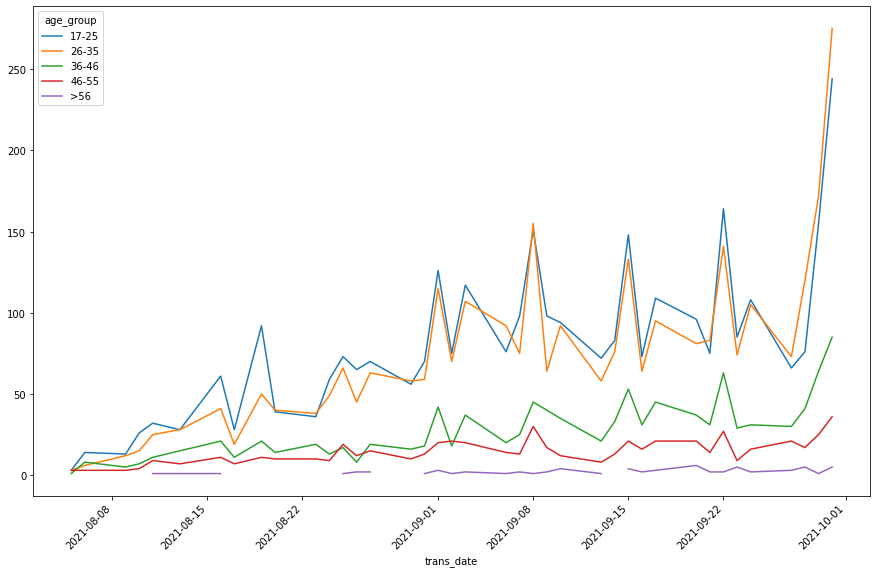

In [97]:
dfage.unstack().plot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

##How Many Users Sale Their Funds in A Given Day

In [98]:
dfsell=dfu[['trans_date','Trans_Day','Trans_Month','Trans_Year','user_id','user_gender','user_age','age_group','user_occupation','user_income_range',
            'Buy_saham','Buy_Pasar_Uang','Buy_Campuran','Buy_Pendapatan_Tetap','Total_Sell']]
dfsell.head()

,trans_date,Trans_Day,Trans_Month,Trans_Year,user_id,user_gender,user_age,age_group,user_occupation,user_income_range,Buy_saham,Buy_Pasar_Uang,Buy_Campuran,Buy_Pendapatan_Tetap,Total_Sell
0,2021-08-17,17,08,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,0.0
1,2021-08-18,18,08,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,0.0
2,2021-08-19,19,08,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,0.0
3,2021-08-20,20,08,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,0.0
4,2021-08-23,23,08,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,0.0


In [99]:
dfsell1=dfsell[dfsell['Total_Sell']!=0]
dfsell1


,trans_date,Trans_Day,Trans_Month,Trans_Year,user_id,user_gender,user_age,age_group,user_occupation,user_income_range,Buy_saham,Buy_Pasar_Uang,Buy_Campuran,Buy_Pendapatan_Tetap,Total_Sell
52,2021-09-15,15,09,2021,3802293,Female,47,46-55,PNS,> Rp 500 Juta - 1 Miliar,2320000.0,350000.0,0.0,830000.0,350000.0
58,2021-09-23,23,09,2021,3802293,Female,47,46-55,PNS,> Rp 500 Juta - 1 Miliar,3300000.0,500000.0,0.0,1200000.0,500000.0
79,2021-09-17,17,09,2021,3783302,Male,57,>56,Swasta,> Rp 50 Juta - 100 Juta,370000.0,100000.0,0.0,530000.0,100000.0
86,2021-09-28,28,09,2021,3783302,Male,57,>56,Swasta,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,-1689569.0
157,2021-08-13,13,08,2021,3770075,Male,54,46-55,Swasta,< 10 Juta,0.0,10000.0,0.0,0.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158725,2021-08-11,11,08,2021,3670811,Male,49,46-55,Swasta,> Rp 50 Juta - 100 Juta,0.0,75000.0,0.0,0.0,75000.0
158737,2021-08-27,27,08,2021,3670811,Male,49,46-55,Swasta,> Rp 50 Juta - 100 Juta,10000.0,20000.0,0.0,0.0,20000.0
158767,2021-08-24,24,08,2021,3812221,Male,49,46-55,PNS,> Rp 100 Juta - 500 Juta,80000.0,10000.0,0.0,60000.0,10000.0
158768,2021-08-25,25,08,2021,3812221,Male,49,46-55,PNS,> Rp 100 Juta - 500 Juta,0.0,0.0,0.0,0.0,-230000.0


This to make negative value becomes positive

In [100]:
dfsell1['Total_Sell']=dfsell1['Total_Sell'].abs()
dfsell1

<ipython-input-100-490f96c81f78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsell1['Total_Sell']=dfsell1['Total_Sell'].abs()


,trans_date,Trans_Day,Trans_Month,Trans_Year,user_id,user_gender,user_age,age_group,user_occupation,user_income_range,Buy_saham,Buy_Pasar_Uang,Buy_Campuran,Buy_Pendapatan_Tetap,Total_Sell
52,2021-09-15,15,09,2021,3802293,Female,47,46-55,PNS,> Rp 500 Juta - 1 Miliar,2320000.0,350000.0,0.0,830000.0,350000.0
58,2021-09-23,23,09,2021,3802293,Female,47,46-55,PNS,> Rp 500 Juta - 1 Miliar,3300000.0,500000.0,0.0,1200000.0,500000.0
79,2021-09-17,17,09,2021,3783302,Male,57,>56,Swasta,> Rp 50 Juta - 100 Juta,370000.0,100000.0,0.0,530000.0,100000.0
86,2021-09-28,28,09,2021,3783302,Male,57,>56,Swasta,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,0.0,1689569.0
157,2021-08-13,13,08,2021,3770075,Male,54,46-55,Swasta,< 10 Juta,0.0,10000.0,0.0,0.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158725,2021-08-11,11,08,2021,3670811,Male,49,46-55,Swasta,> Rp 50 Juta - 100 Juta,0.0,75000.0,0.0,0.0,75000.0
158737,2021-08-27,27,08,2021,3670811,Male,49,46-55,Swasta,> Rp 50 Juta - 100 Juta,10000.0,20000.0,0.0,0.0,20000.0
158767,2021-08-24,24,08,2021,3812221,Male,49,46-55,PNS,> Rp 100 Juta - 500 Juta,80000.0,10000.0,0.0,60000.0,10000.0
158768,2021-08-25,25,08,2021,3812221,Male,49,46-55,PNS,> Rp 100 Juta - 500 Juta,0.0,0.0,0.0,0.0,230000.0


In [101]:
grouping2=dfsell1.groupby(['trans_date'])['user_id'].count()

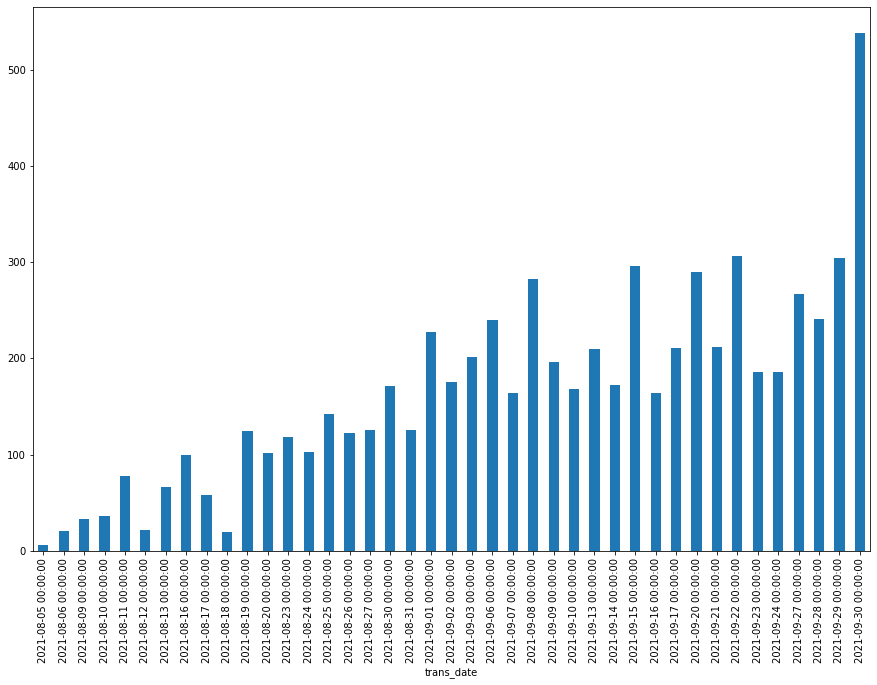

In [102]:
grouping2.plot.bar(figsize=(15,10))

##Is Gender Affecting in User Behavior in Selling Funds

In [103]:
dfgender2=dfsell1.groupby(['trans_date','user_gender']).count()['user_id']
dfgender2

trans_date  user_gender
2021-08-05  Female           4
            Male             2
2021-08-06  Female           7
            Male            14
2021-08-09  Female           8
                          ... 
2021-09-28  Male           145
2021-09-29  Female         122
            Male           182
2021-09-30  Female         230
            Male           308
Name: user_id, Length: 82, dtype: int64

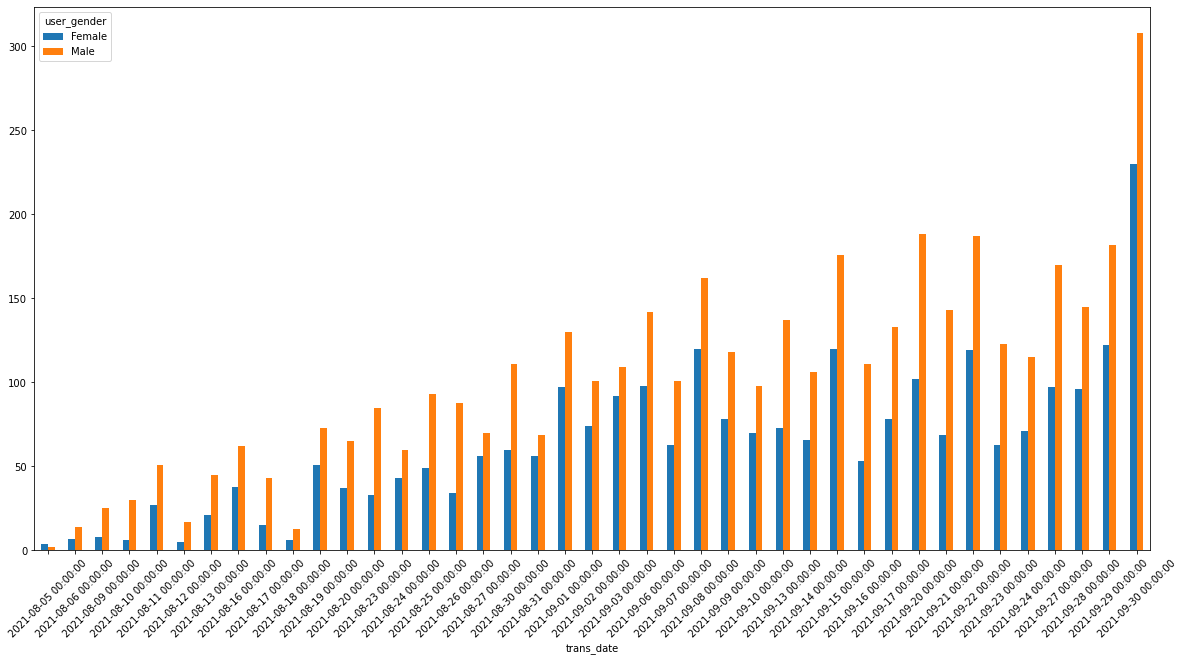

In [104]:
dfgender2.unstack().plot.bar(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

##Does User Occupation Dicate The Way They Sell Funds?

In [105]:
dfoc2=dfsell1.groupby(['trans_date','user_occupation']).count()['user_id']
dfoc2

trans_date  user_occupation
2021-08-05  Pelajar              3
            Swasta               3
2021-08-06  IRT                  1
            Lainnya              3
            Pelajar             12
                              ... 
2021-09-30  Lainnya             61
            PNS                  6
            Pelajar            276
            Pengusaha           19
            Swasta             152
Name: user_id, Length: 261, dtype: int64

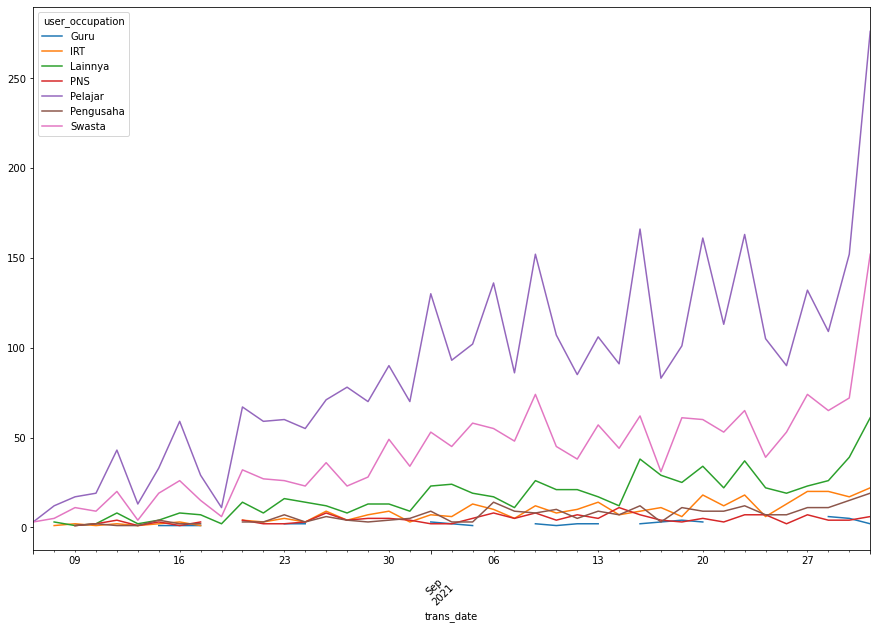

In [106]:
dfoc2.unstack().plot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

## Does User_income_range have an effect in user behavior selling their funds?

In [107]:
dfsal2=dfsell1.groupby(['trans_date','user_income_range']).count()['user_id']
dfsal2

trans_date  user_income_range       
2021-08-05  < 10 Juta                     4
            > Rp 50 Juta - 100 Juta       1
            Rp 10 Juta - 50 Juta          1
2021-08-06  < 10 Juta                    11
            > Rp 100 Juta - 500 Juta      1
                                       ... 
2021-09-30  < 10 Juta                   176
            > Rp 100 Juta - 500 Juta     66
            > Rp 50 Juta - 100 Juta     103
            > Rp 500 Juta - 1 Miliar      9
            Rp 10 Juta - 50 Juta        184
Name: user_id, Length: 206, dtype: int64

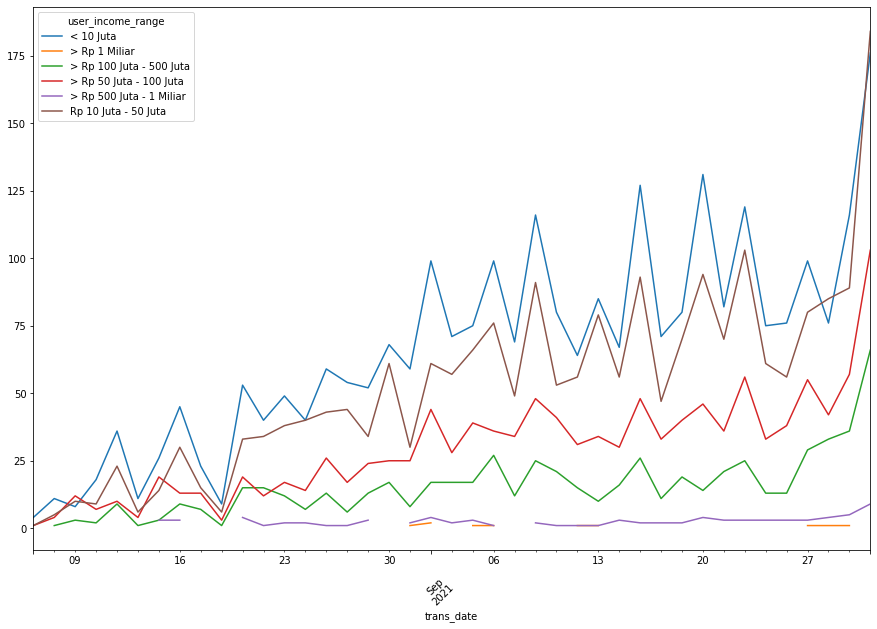

In [108]:
dfsal2.unstack().plot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

**bold text**# Does Age Affect User in Selling Their Funds?

In [109]:
dfage2=dfsell1.groupby(['trans_date','age_group']).count()['user_id']
dfage2

trans_date  age_group
2021-08-05  17-25          2
            26-35          2
            36-46          1
            46-55          1
2021-08-06  17-25         12
                        ... 
2021-09-30  17-25        212
            26-35        231
            36-46         68
            46-55         24
            >56            3
Name: user_id, Length: 186, dtype: int64

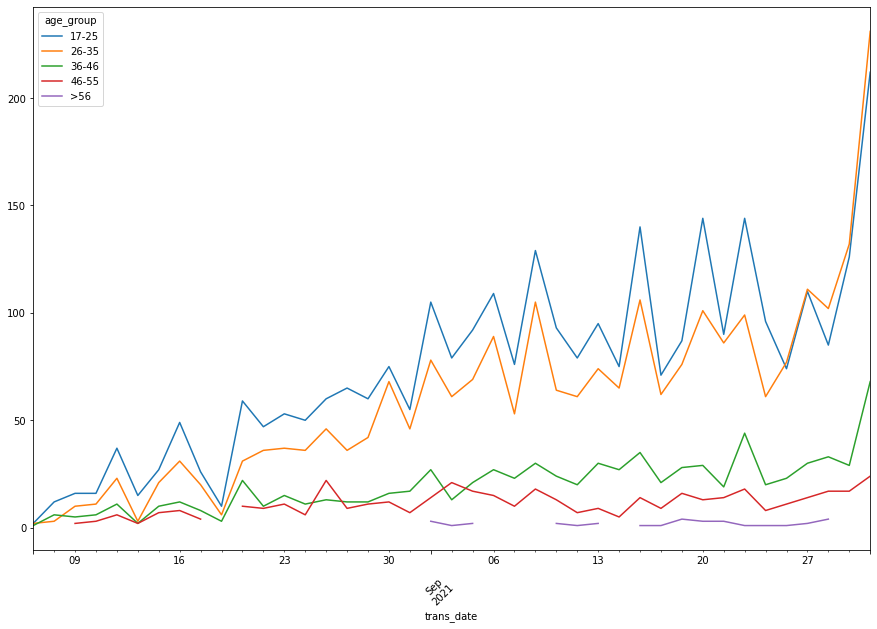

In [110]:
dfage2.unstack().plot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

##Monthly Average Total Buy 

In [111]:
dfubuy1

,trans_date,Trans_Day,Trans_Month,Trans_Year,user_id,user_gender,user_age,age_group,user_occupation,user_income_range,Buy_saham,Buy_Pasar_Uang,Buy_Campuran,Buy_Pendapatan_Tetap,Total_Buy
22,2021-09-16,16,09,2021,3816789,Female,53,46-55,IRT,> Rp 50 Juta - 100 Juta,100000.0,0.0,0.0,0.0,100000.0
52,2021-09-15,15,09,2021,3802293,Female,47,46-55,PNS,> Rp 500 Juta - 1 Miliar,2320000.0,350000.0,0.0,830000.0,3500000.0
58,2021-09-23,23,09,2021,3802293,Female,47,46-55,PNS,> Rp 500 Juta - 1 Miliar,3300000.0,500000.0,0.0,1200000.0,5000000.0
70,2021-09-30,30,09,2021,3049927,Male,53,46-55,Swasta,< 10 Juta,0.0,0.0,149000.0,0.0,149000.0
79,2021-09-17,17,09,2021,3783302,Male,57,>56,Swasta,> Rp 50 Juta - 100 Juta,370000.0,100000.0,0.0,530000.0,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158739,2021-08-31,31,08,2021,3670811,Male,49,46-55,Swasta,> Rp 50 Juta - 100 Juta,0.0,0.0,0.0,25000.0,25000.0
158758,2021-09-27,27,09,2021,3670811,Male,49,46-55,Swasta,> Rp 50 Juta - 100 Juta,100000.0,0.0,0.0,0.0,100000.0
158767,2021-08-24,24,08,2021,3812221,Male,49,46-55,PNS,> Rp 100 Juta - 500 Juta,80000.0,10000.0,0.0,60000.0,150000.0
158801,2021-09-17,17,09,2021,3881981,Female,49,46-55,Pengusaha,> Rp 100 Juta - 500 Juta,0.0,10000000.0,0.0,40000000.0,50000000.0


In [112]:
dfmonbuy=dfubuy1.groupby(['Trans_Year','Trans_Month'])['Total_Buy'].mean()
dfmonbuy

Trans_Year  Trans_Month
2021        08             1.822756e+06
            09             1.518893e+06
Name: Total_Buy, dtype: float64

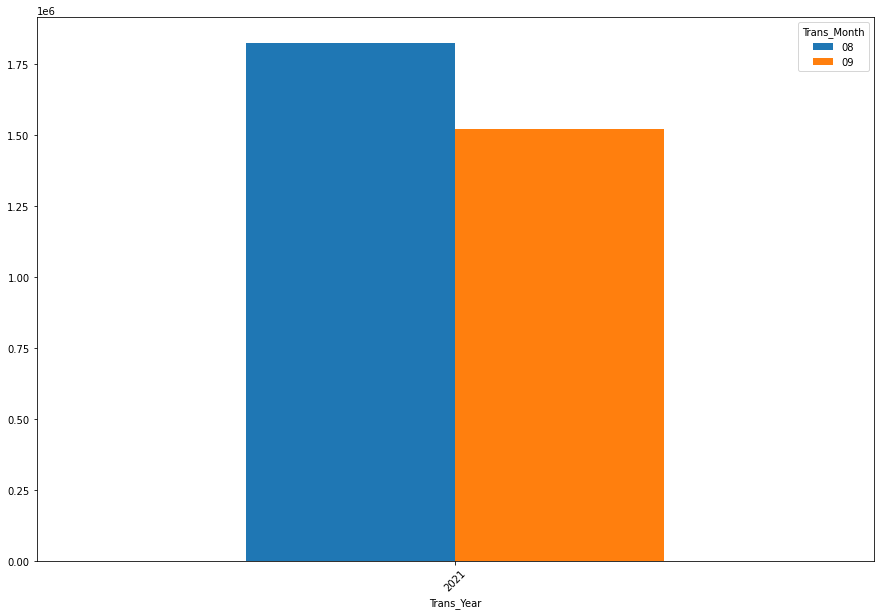

In [113]:
dfmonbuy.unstack().plot.bar(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

##Monthly Average Total Sell 

In [114]:
dfmonsell=dfsell1.groupby(['Trans_Year','Trans_Month'])['Total_Sell'].mean()
dfmonsell

Trans_Year  Trans_Month
2021        08             840354.504453
            09             726214.293163
Name: Total_Sell, dtype: float64

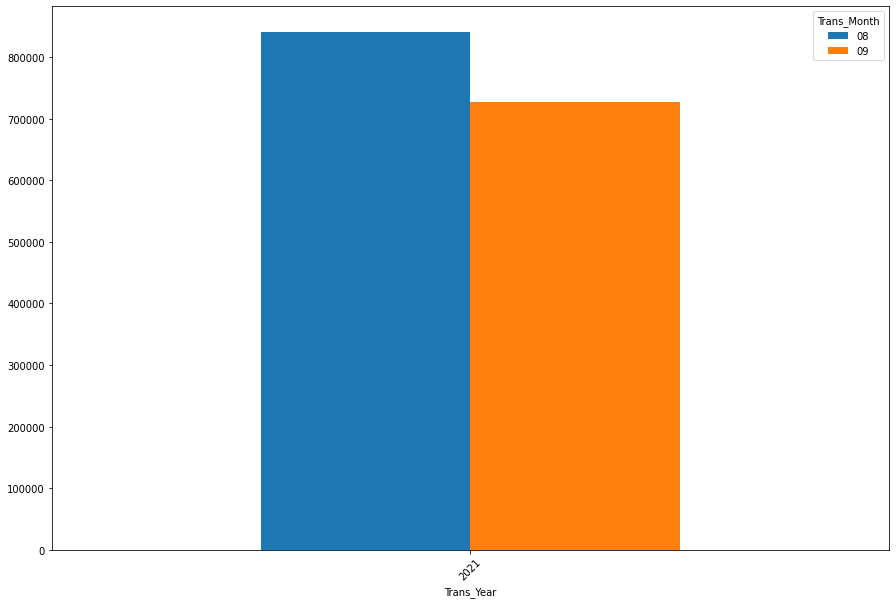

In [115]:
dfmonsell.unstack().plot.bar(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

##Monthly Average AUM

In [116]:
dfedit3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           158811 non-null  object        
 1   reg_date                          158811 non-null  datetime64[ns]
 2   user_gender                       158811 non-null  object        
 3   user_age                          158811 non-null  int64         
 4   user_occupation                   158811 non-null  object        
 5   user_income_range                 158811 non-null  object        
 6   referral_code_used                158811 non-null  object        
 7   user_income_source                158811 non-null  object        
 8   trans_date                        158811 non-null  datetime64[ns]
 9   Saham_AUM                         158811 non-null  float64       
 10  Saham_invested_amount           

In [117]:
monaum=dfedit3.groupby(['Trans_Year','Trans_Month'])['Total_AUM'].mean()
monaum

Trans_Year  Trans_Month
2021        08             2.122117e+06
            09             2.516401e+06
Name: Total_AUM, dtype: float64

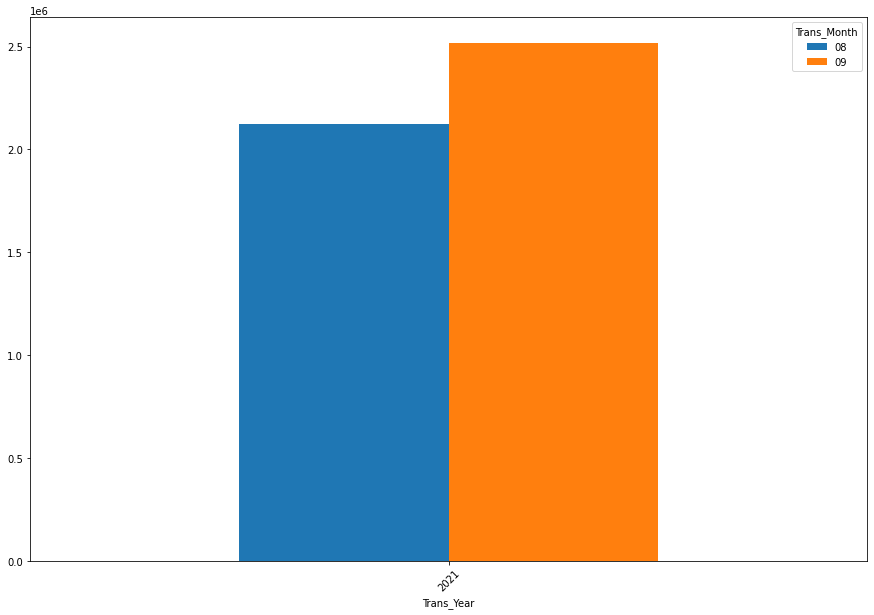

In [118]:
monaum.unstack().plot.bar(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

##Monthly Average Invested Amount

In [119]:
moninvest=dfedit3.groupby(['Trans_Year','Trans_Month'])['Total_Invested_Amount'].mean()
moninvest

Trans_Year  Trans_Month
2021        08             2.134880e+06
            09             2.517185e+06
Name: Total_Invested_Amount, dtype: float64

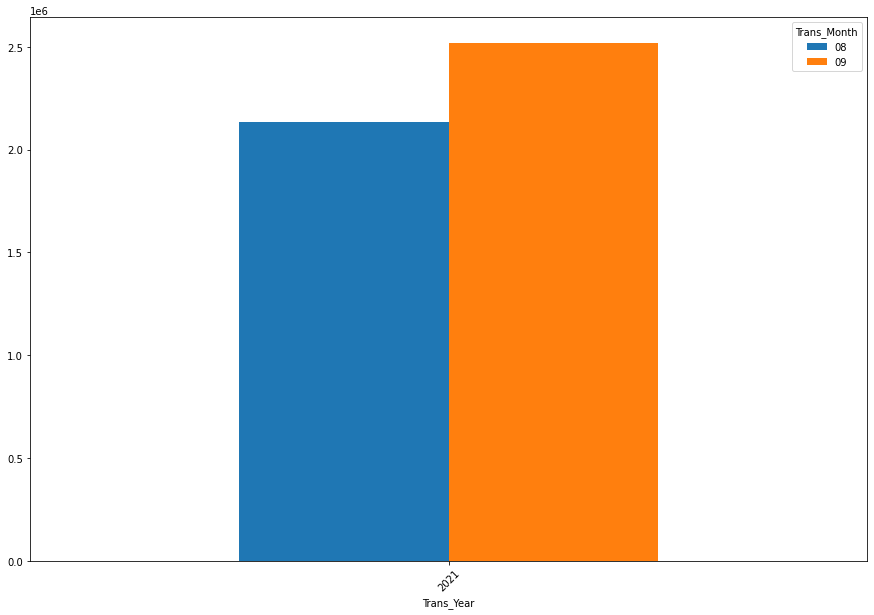

In [120]:
moninvest.unstack().plot.bar(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

##Monthly Average Profit/Loss

In [121]:
monprof=dfedit3.groupby(['Trans_Year','Trans_Month'])['Profit_Loss_Total'].mean()
monprof

Trans_Year  Trans_Month
2021        08            -12763.354099
            09              -783.520655
Name: Profit_Loss_Total, dtype: float64

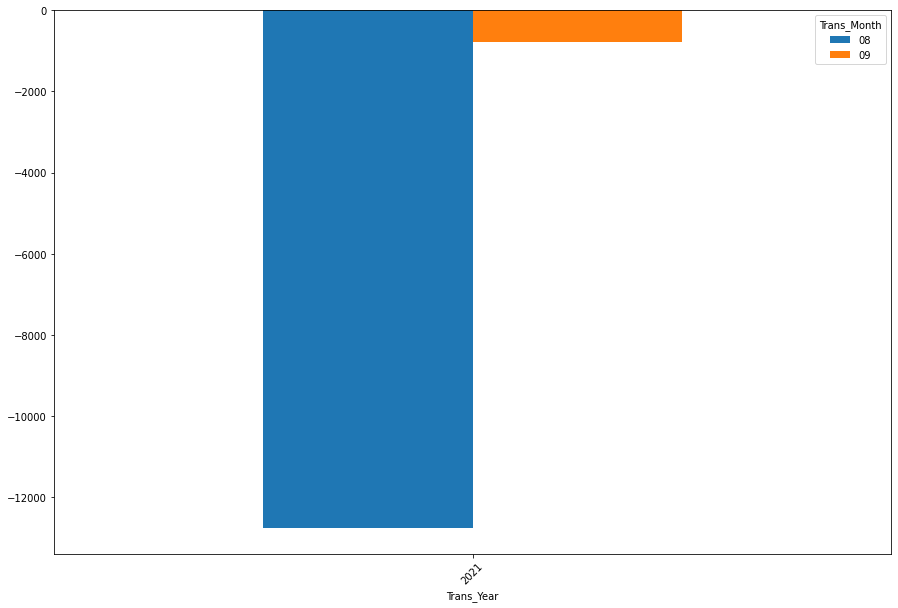

In [122]:
monprof.unstack().plot.bar(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

##Which Funds Users Invested More?

In [123]:
monfunds=dfedit3.groupby(['Trans_Year','Trans_Month'])['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount'].mean()
monfunds

<ipython-input-123-6753efd4a40f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monfunds=dfedit3.groupby(['Trans_Year','Trans_Month'])['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount'].mean()


Saham_invested_amount  Pasar_Uang_invested_amount  \
Trans_Year Trans_Month                                                      
2021       08                   241518.127621               483332.847512   
           09                   309309.765877               745282.407565   

                        Pendapatan_Tetap_invested_amount  \
Trans_Year Trans_Month                                     
2021       08                               1.014804e+06   
           09                               1.231467e+06   

                        Campuran_invested_amount  
Trans_Year Trans_Month                            
2021       08                      395225.345305  
           09                      231125.136593

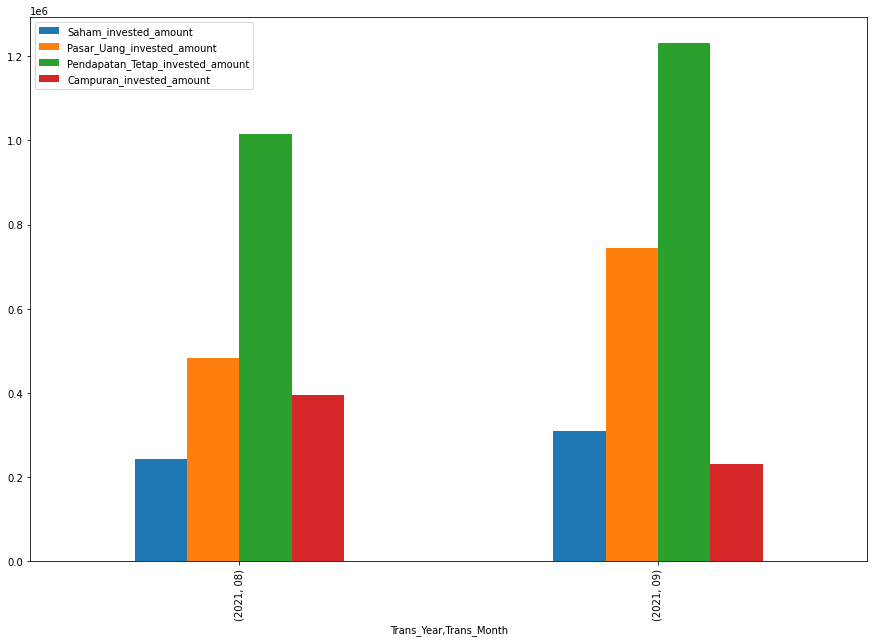

In [124]:
monfunds.plot(kind='bar',figsize=(15,10))

Both in August and September, the most preffered funds for our customers are fixed incomes and market money. This of course because both funds are relatively low risk hence give sense of security for customers

In [125]:
dfedit4=dfedit3.copy()

##Adding Column Days

In [126]:
dfedit4['Days'] = dfedit4['trans_date'].dt.strftime('%a')
dfedit4.head()

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Profit_Loss_Campuran,Total_AUM,Total_Invested_Amount,Profit_Loss_Total,Total_Buy,Total_Sell,Trans_Month,Trans_Year,Trans_Day,Days
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-17,189109.0,...,0.0,499205.0,500000.0,-795.0,0.0,0.0,08,2021,17,Tue
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-18,188542.0,...,0.0,498963.0,500000.0,-1037.0,0.0,0.0,08,2021,18,Wed
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-19,185228.0,...,0.0,495682.0,500000.0,-4318.0,0.0,0.0,08,2021,19,Thu
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-20,184354.0,...,0.0,494563.0,500000.0,-5437.0,0.0,0.0,08,2021,20,Fri
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-08-23,186365.0,...,0.0,496727.0,500000.0,-3273.0,0.0,0.0,08,2021,23,Mon


In [127]:
# Setup Categorical for sorting variable
c_s = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat',
       'Sun']
cat_dtype = pd.Categorical(c_s, ordered=True)
dfedit4['Days'] = pd.Categorical(dfedit4['Days'],
                                    categories=c_s,
                                    ordered=True)
dfedit4 = dfedit4.sort_values(by= "Days")
dfedit4.head()

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Profit_Loss_Campuran,Total_AUM,Total_Invested_Amount,Profit_Loss_Total,Total_Buy,Total_Sell,Trans_Month,Trans_Year,Trans_Day,Days
132696,3783839,2021-08-07 11:52:37,Male,33,Swasta,> Rp 100 Juta - 500 Juta,not used,Gaji,2021-08-30,52041.0,...,0.0,112217.0,110000.0,2217.0,0.0,0.0,08,2021,30,Mon
71384,4014004,2021-09-09 18:39:08,Female,23,Pelajar,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-20,90000.0,...,0.0,200193.0,200000.0,193.0,0.0,0.0,09,2021,20,Mon
27905,3829136,2021-08-14 09:05:02,Female,20,Pelajar,< 10 Juta,used referral,Gaji,2021-08-30,91978.0,...,0.0,277873.0,275000.0,2873.0,0.0,0.0,08,2021,30,Mon
145113,3793901,2021-08-08 17:35:09,Female,38,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,2021-09-20,41458.0,...,0.0,126843.0,125000.0,1843.0,0.0,0.0,09,2021,20,Mon
71389,4014004,2021-09-09 18:39:08,Female,23,Pelajar,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-27,90824.0,...,0.0,201005.0,200000.0,1005.0,0.0,0.0,09,2021,27,Mon


##Adding Column Net Transaction

In [128]:
dfedit4['Net_Transaction']=dfedit4['Total_Buy']-dfedit4['Total_Sell']
dfedit4.head()

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Total_AUM,Total_Invested_Amount,Profit_Loss_Total,Total_Buy,Total_Sell,Trans_Month,Trans_Year,Trans_Day,Days,Net_Transaction
132696,3783839,2021-08-07 11:52:37,Male,33,Swasta,> Rp 100 Juta - 500 Juta,not used,Gaji,2021-08-30,52041.0,...,112217.0,110000.0,2217.0,0.0,0.0,08,2021,30,Mon,0.0
71384,4014004,2021-09-09 18:39:08,Female,23,Pelajar,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-20,90000.0,...,200193.0,200000.0,193.0,0.0,0.0,09,2021,20,Mon,0.0
27905,3829136,2021-08-14 09:05:02,Female,20,Pelajar,< 10 Juta,used referral,Gaji,2021-08-30,91978.0,...,277873.0,275000.0,2873.0,0.0,0.0,08,2021,30,Mon,0.0
145113,3793901,2021-08-08 17:35:09,Female,38,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,2021-09-20,41458.0,...,126843.0,125000.0,1843.0,0.0,0.0,09,2021,20,Mon,0.0
71389,4014004,2021-09-09 18:39:08,Female,23,Pelajar,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-27,90824.0,...,201005.0,200000.0,1005.0,0.0,0.0,09,2021,27,Mon,0.0


In [129]:
dfedit5=dfedit4[dfedit4['Net_Transaction']!=0]
dfedit5

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Total_AUM,Total_Invested_Amount,Profit_Loss_Total,Total_Buy,Total_Sell,Trans_Month,Trans_Year,Trans_Day,Days,Net_Transaction
27900,3829136,2021-08-14 09:05:02,Female,20,Pelajar,< 10 Juta,used referral,Gaji,2021-08-23,91104.0,...,276231.0,275000.0,1231.0,25000.0,0.0,08,2021,23,Mon,25000.0
145088,3793901,2021-08-08 17:35:09,Female,38,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,2021-08-16,40218.0,...,125193.0,125000.0,193.0,25000.0,0.0,08,2021,16,Mon,25000.0
71320,4063993,2021-09-15 17:39:45,Male,23,Pengusaha,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-27,10934.0,...,10934.0,10954.0,-20.0,0.0,-79046.0,09,2021,27,Mon,79046.0
123715,3748560,2021-08-03 22:30:22,Female,30,Pelajar,> Rp 100 Juta - 500 Juta,not used,Gaji,2021-08-30,251187.0,...,491847.0,500000.0,-8153.0,0.0,-500000.0,08,2021,30,Mon,500000.0
123725,3748560,2021-08-03 22:30:22,Female,30,Pelajar,> Rp 100 Juta - 500 Juta,not used,Gaji,2021-09-13,0.0,...,0.0,0.0,0.0,0.0,-450000.0,09,2021,13,Mon,450000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116735,645641,2021-08-03 09:57:46,Male,29,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-24,71746.0,...,122071.0,120000.0,2071.0,10000.0,0.0,09,2021,24,Fri,10000.0
136288,3910428,2021-08-30 09:01:21,Female,34,Swasta,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-17,744072.0,...,2571381.0,2600871.0,-29490.0,600000.0,70000.0,09,2021,17,Fri,530000.0
45925,3735384,2021-08-01 16:50:44,Male,21,Pelajar,< 10 Juta,used referral,Undian,2021-08-20,0.0,...,30022.0,30000.0,22.0,10000.0,0.0,08,2021,20,Fri,10000.0
85789,3817514,2021-08-12 10:39:39,Female,25,PNS,< 10 Juta,not used,Gaji,2021-09-24,857983.0,...,4086416.0,4072000.0,14416.0,500000.0,0.0,09,2021,24,Fri,500000.0


##Day to Day Transaction

In [130]:
daystrans=dfedit5.groupby(['Trans_Month','Trans_Day'])['Net_Transaction'].sum()
daystrans

Trans_Month  Trans_Day
08           05            11840000.0
             06            20369930.0
             09            41979132.0
             10            12939994.0
             11            67395024.0
             12             8364864.0
             13           311477030.0
             16           450154422.0
             17            43619141.0
             18             2715889.0
             19           132304012.0
             20           116997014.0
             23           276322744.0
             24            99219137.0
             25           308054257.0
             26           178671753.0
             27           158377180.0
             30           153167825.0
             31           232219294.0
09           01           468494147.0
             02           142311553.0
             03           383517355.0
             06           656915642.0
             07           170912184.0
             08           167496394.0
             09           1

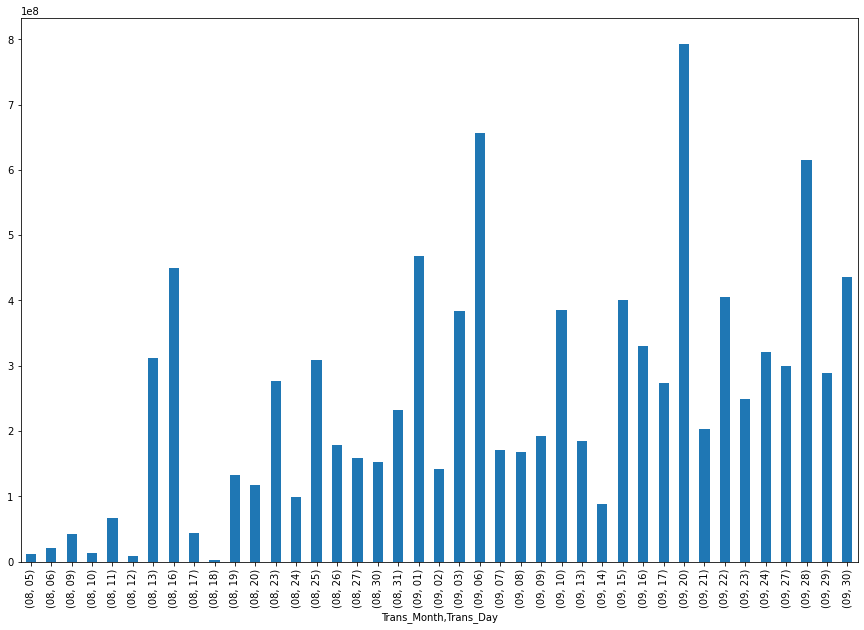

In [131]:
daystrans.plot(kind='bar',figsize=(15,10))

##Week to Week Transaction

In [132]:
transweek=dfedit5.groupby(['Trans_Month','Days'])['Net_Transaction'].sum()
transweek

Trans_Month  Days
08           Mon     9.216241e+08
             Tue     3.879976e+08
             Wed     3.781652e+08
             Thu     3.311806e+08
             Fri     6.072212e+08
             Sat     0.000000e+00
             Sun     0.000000e+00
09           Mon     1.934572e+09
             Tue     1.076272e+09
             Wed     1.731426e+09
             Thu     1.350164e+09
             Fri     1.363391e+09
             Sat     0.000000e+00
             Sun     0.000000e+00
Name: Net_Transaction, dtype: float64

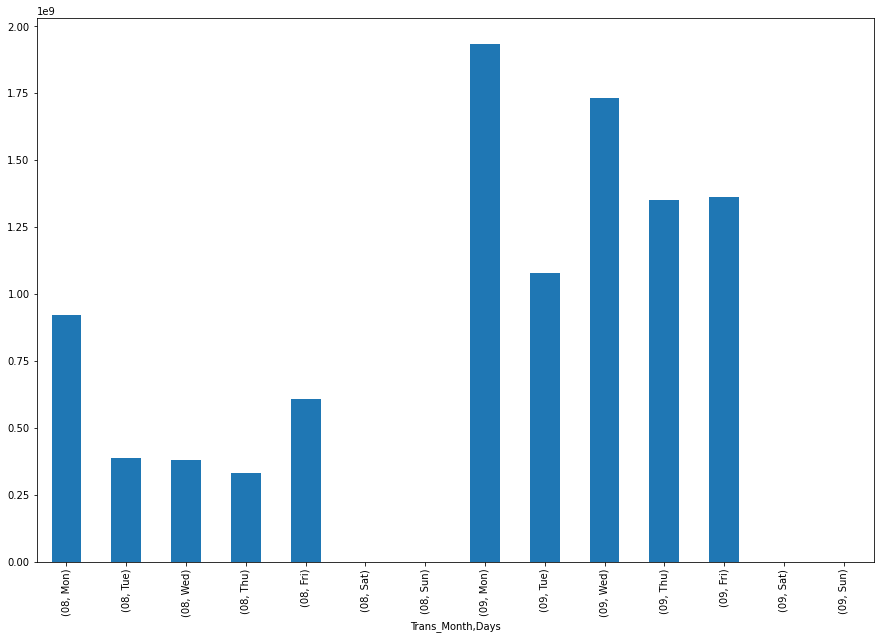

In [133]:
transweek.plot(kind='bar',figsize=(15,10))

##Month to Month Transaction

In [134]:
transmonth=dfedit5.groupby(['Trans_Month'])['Net_Transaction'].sum()
transmonth

Trans_Month
08    2.626189e+09
09    7.455825e+09
Name: Net_Transaction, dtype: float64

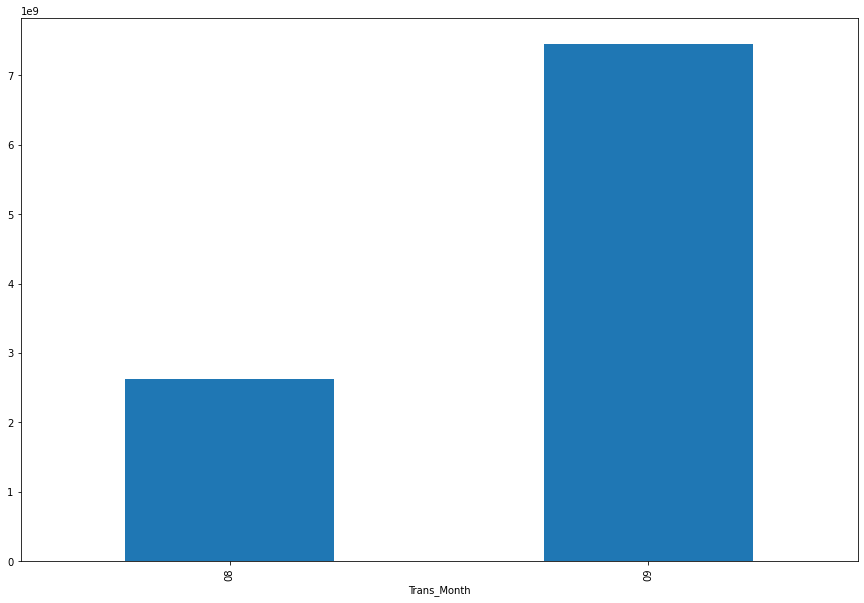

In [135]:
transmonth.plot(kind='bar',figsize=(15,10))

# **Customer Segmentation**

## End of Period September 2021

For the customer segmentatio, we will concentrate on the historical data of September 30 2021

In [136]:
dfedit6 = dfedit4.loc[(dfedit4['trans_date'] == '2021-09-30')]
dfedit6

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Total_AUM,Total_Invested_Amount,Profit_Loss_Total,Total_Buy,Total_Sell,Trans_Month,Trans_Year,Trans_Day,Days,Net_Transaction
110348,3940450,2021-08-31 09:57:10,Male,28,Lainnya,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-30,11369.0,...,11369.0,10828.0,541.0,0.0,0.0,09,2021,30,Thu,0.0
111207,3953161,2021-09-02 01:15:20,Male,28,Pelajar,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-30,0.0,...,0.0,0.0,0.0,0.0,0.0,09,2021,30,Thu,0.0
155794,3764486,2021-08-22 16:48:11,Female,45,IRT,< 10 Juta,not used,Lainnya,2021-09-30,0.0,...,0.0,0.0,0.0,0.0,0.0,09,2021,30,Thu,0.0
157225,3739635,2021-08-05 10:02:52,Female,48,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,2021-09-30,0.0,...,5051672.0,5000000.0,51672.0,0.0,0.0,09,2021,30,Thu,0.0
109393,3861702,2021-08-19 12:42:57,Female,28,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,94599.0,...,204982.0,200000.0,4982.0,0.0,0.0,09,2021,30,Thu,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77961,3736480,2021-08-01 20:47:57,Female,24,Pelajar,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-30,200947.0,...,713168.0,700000.0,13168.0,0.0,0.0,09,2021,30,Thu,0.0
103880,3916318,2021-08-27 17:34:15,Male,27,Swasta,> Rp 100 Juta - 500 Juta,used referral,Gaji,2021-09-30,8888386.0,...,85348061.0,85010500.0,337561.0,10500.0,0.0,09,2021,30,Thu,10500.0
105632,3342940,2021-08-18 08:58:52,Female,27,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,156280.0,...,206547.0,200000.0,6547.0,0.0,0.0,09,2021,30,Thu,0.0
76976,3805660,2021-08-10 13:30:56,Female,24,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,0.0,...,2106611.0,2100000.0,6611.0,0.0,0.0,09,2021,30,Thu,0.0


## Adding New Column/Variables Age Group

##Data Preprocessing

### Importing All Libraries needed

In [137]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
from sklearn import preprocessing
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import LabelEncoder


In [138]:
dfcust=dfedit6.copy()

In [139]:
dfcust.columns.tolist()

['user_id',
 'reg_date',
 'user_gender',
 'user_age',
 'user_occupation',
 'user_income_range',
 'referral_code_used',
 'user_income_source',
 'trans_date',
 'Saham_AUM',
 'Saham_invested_amount',
 'Buy_saham',
 'Sell_saham',
 'Profit_Loss_saham',
 'Pasar_Uang_AUM',
 'Pasar_Uang_invested_amount',
 'Buy_Pasar_Uang',
 'Sell_Pasar_Uang',
 'Profit_Loss_Pasar_Uang',
 'Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_invested_amount',
 'Buy_Pendapatan_Tetap',
 'Sell_Pendapatan_Tetap',
 'Profit_Loss_Pendapatan_Tetap',
 'Campuran_AUM',
 'Campuran_invested_amount',
 'Buy_Campuran',
 'Sell_Campuran',
 'Profit_Loss_Campuran',
 'Total_AUM',
 'Total_Invested_Amount',
 'Profit_Loss_Total',
 'Total_Buy',
 'Total_Sell',
 'Trans_Month',
 'Trans_Year',
 'Trans_Day',
 'Days',
 'Net_Transaction']

## Setting Categorical for Occupation and User Income Range and User Age

In [140]:
dfcust.loc[dfcust['user_occupation'] == 'PNS', 'user_occupation'] = 'Lainnya'
dfcust.loc[dfcust['user_occupation'] == 'Guru', 'user_occupation'] = 'Lainnya'
dfcust.loc[dfcust['user_occupation'] == 'TNI/Polisi', 'user_occupation'] = 'Lainnya'
dfcust.loc[dfcust['user_occupation'] == 'Pensiunan', 'user_occupation'] = 'Lainnya'

dfcust.loc[dfcust['user_income_range'] == '> Rp 100 Juta - 500 Juta', 'user_income_range'] = '> Rp 100 Juta'
dfcust.loc[dfcust['user_income_range'] == '> Rp 500 Juta - 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'
dfcust.loc[dfcust['user_income_range'] == '> Rp 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'

In [141]:
dfcust.loc[dfcust['user_age'] > 40, 'user_generation'] = 'Gen-X'
dfcust.loc[dfcust['user_age'].between(25,40), 'user_generation'] = 'Gen-Y'
dfcust.loc[dfcust['user_age'] <= 24, 'user_generation'] = 'Gen-Z'


## Features Engineering

### Feature Selection

In [142]:
dfcust2=dfcust[['user_id','user_gender','user_generation','user_occupation','user_income_range','referral_code_used',
                'Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount',
                'Campuran_invested_amount']]

In [143]:
dfcust2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 110348 to 73504
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           8277 non-null   object 
 1   user_gender                       8277 non-null   object 
 2   user_generation                   8277 non-null   object 
 3   user_occupation                   8277 non-null   object 
 4   user_income_range                 8277 non-null   object 
 5   referral_code_used                8277 non-null   object 
 6   Saham_invested_amount             8277 non-null   float64
 7   Pasar_Uang_invested_amount        8277 non-null   float64
 8   Pendapatan_Tetap_invested_amount  8277 non-null   float64
 9   Campuran_invested_amount          8277 non-null   float64
dtypes: float64(4), object(6)
memory usage: 711.3+ KB


In [144]:
dfcust2

,user_id,user_gender,user_generation,user_occupation,user_income_range,referral_code_used,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
110348,3940450,Male,Gen-Y,Lainnya,Rp 10 Juta - 50 Juta,used referral,10828.0,0.0,0.0,0.0
111207,3953161,Male,Gen-Y,Pelajar,Rp 10 Juta - 50 Juta,used referral,0.0,0.0,0.0,0.0
155794,3764486,Female,Gen-X,IRT,< 10 Juta,not used,0.0,0.0,0.0,0.0
157225,3739635,Female,Gen-X,IRT,Rp 10 Juta - 50 Juta,used referral,0.0,0.0,5000000.0,0.0
109393,3861702,Female,Gen-Y,Pelajar,> Rp 50 Juta - 100 Juta,not used,90000.0,20000.0,90000.0,0.0
...,...,...,...,...,...,...,...,...,...,...
77961,3736480,Female,Gen-Z,Pelajar,Rp 10 Juta - 50 Juta,not used,190000.0,420000.0,90000.0,0.0
103880,3916318,Male,Gen-Y,Swasta,> Rp 100 Juta,used referral,8570000.0,49210000.0,27230500.0,0.0
105632,3342940,Female,Gen-Y,Pelajar,> Rp 50 Juta - 100 Juta,not used,150000.0,10000.0,40000.0,0.0
76976,3805660,Female,Gen-Z,Pelajar,> Rp 50 Juta - 100 Juta,not used,0.0,2100000.0,0.0,0.0


In [145]:
dfcust2['user_income_range'].unique().tolist()

['Rp 10 Juta - 50 Juta',
 '< 10 Juta',
 '> Rp 50 Juta - 100 Juta',
 '> Rp 100 Juta']

### Convert Categorical Feature into Numerical Using Label Encoder

In [146]:
le = LabelEncoder()

for cat_var in ['user_gender', 'referral_code_used','user_income_range']:
    dfcust2[cat_var] = le.fit_transform(dfcust2[cat_var])  
dfcust2

<ipython-input-146-3abdad7c8033>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcust2[cat_var] = le.fit_transform(dfcust2[cat_var])


,user_id,user_gender,user_generation,user_occupation,user_income_range,referral_code_used,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
110348,3940450,1,Gen-Y,Lainnya,3,1,10828.0,0.0,0.0,0.0
111207,3953161,1,Gen-Y,Pelajar,3,1,0.0,0.0,0.0,0.0
155794,3764486,0,Gen-X,IRT,0,0,0.0,0.0,0.0,0.0
157225,3739635,0,Gen-X,IRT,3,1,0.0,0.0,5000000.0,0.0
109393,3861702,0,Gen-Y,Pelajar,2,0,90000.0,20000.0,90000.0,0.0
...,...,...,...,...,...,...,...,...,...,...
77961,3736480,0,Gen-Z,Pelajar,3,0,190000.0,420000.0,90000.0,0.0
103880,3916318,1,Gen-Y,Swasta,1,1,8570000.0,49210000.0,27230500.0,0.0
105632,3342940,0,Gen-Y,Pelajar,2,0,150000.0,10000.0,40000.0,0.0
76976,3805660,0,Gen-Z,Pelajar,2,0,0.0,2100000.0,0.0,0.0


In [147]:
dfcust3=dfcust2.copy()

### Encoding Categorical Using One Hot Encoder

In [148]:
dfcust3 = pd.get_dummies(dfcust3, columns=['user_generation','user_occupation'])
dfcust3

,user_id,user_gender,user_income_range,referral_code_used,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount,user_generation_Gen-X,user_generation_Gen-Y,user_generation_Gen-Z,user_occupation_IRT,user_occupation_Lainnya,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta
110348,3940450,1,3,1,10828.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0
111207,3953161,1,3,1,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0
155794,3764486,0,0,0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0
157225,3739635,0,3,1,0.0,0.0,5000000.0,0.0,1,0,0,1,0,0,0,0
109393,3861702,0,2,0,90000.0,20000.0,90000.0,0.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77961,3736480,0,3,0,190000.0,420000.0,90000.0,0.0,0,0,1,0,0,1,0,0
103880,3916318,1,1,1,8570000.0,49210000.0,27230500.0,0.0,0,1,0,0,0,0,0,1
105632,3342940,0,2,0,150000.0,10000.0,40000.0,0.0,0,1,0,0,0,1,0,0
76976,3805660,0,2,0,0.0,2100000.0,0.0,0.0,0,0,1,0,0,1,0,0


In [149]:
dfcust3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 110348 to 73504
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           8277 non-null   object 
 1   user_gender                       8277 non-null   int64  
 2   user_income_range                 8277 non-null   int64  
 3   referral_code_used                8277 non-null   int64  
 4   Saham_invested_amount             8277 non-null   float64
 5   Pasar_Uang_invested_amount        8277 non-null   float64
 6   Pendapatan_Tetap_invested_amount  8277 non-null   float64
 7   Campuran_invested_amount          8277 non-null   float64
 8   user_generation_Gen-X             8277 non-null   uint8  
 9   user_generation_Gen-Y             8277 non-null   uint8  
 10  user_generation_Gen-Z             8277 non-null   uint8  
 11  user_occupation_IRT               8277 non-null   uint8  
 12  

In [150]:
dfcust4=dfcust3[['user_id','user_gender','user_income_range','referral_code_used',
                 'user_generation_Gen-X','user_generation_Gen-Y',
                 'user_generation_Gen-Z','user_occupation_IRT',
                 'user_occupation_Lainnya','user_occupation_Pelajar',
                 'user_occupation_Pengusaha','user_occupation_Swasta']]
dfcust4

,user_id,user_gender,user_income_range,referral_code_used,user_generation_Gen-X,user_generation_Gen-Y,user_generation_Gen-Z,user_occupation_IRT,user_occupation_Lainnya,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta
110348,3940450,1,3,1,0,1,0,0,1,0,0,0
111207,3953161,1,3,1,0,1,0,0,0,1,0,0
155794,3764486,0,0,0,1,0,0,1,0,0,0,0
157225,3739635,0,3,1,1,0,0,1,0,0,0,0
109393,3861702,0,2,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77961,3736480,0,3,0,0,0,1,0,0,1,0,0
103880,3916318,1,1,1,0,1,0,0,0,0,0,1
105632,3342940,0,2,0,0,1,0,0,0,1,0,0
76976,3805660,0,2,0,0,0,1,0,0,1,0,0


In [151]:
dfcust4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 110348 to 73504
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   user_id                    8277 non-null   object
 1   user_gender                8277 non-null   int64 
 2   user_income_range          8277 non-null   int64 
 3   referral_code_used         8277 non-null   int64 
 4   user_generation_Gen-X      8277 non-null   uint8 
 5   user_generation_Gen-Y      8277 non-null   uint8 
 6   user_generation_Gen-Z      8277 non-null   uint8 
 7   user_occupation_IRT        8277 non-null   uint8 
 8   user_occupation_Lainnya    8277 non-null   uint8 
 9   user_occupation_Pelajar    8277 non-null   uint8 
 10  user_occupation_Pengusaha  8277 non-null   uint8 
 11  user_occupation_Swasta     8277 non-null   uint8 
dtypes: int64(3), object(1), uint8(8)
memory usage: 388.0+ KB


### Standerize Data

In [152]:
scaler = RobustScaler()
std_data = dfcust4.set_index('user_id')
std_data[:] = scaler.fit_transform(std_data[:])
std_data

,user_gender,user_income_range,referral_code_used,user_generation_Gen-X,user_generation_Gen-Y,user_generation_Gen-Z,user_occupation_IRT,user_occupation_Lainnya,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta
user_id,,,,,,,,,,,
3940450,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0
3953161,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3764486,-1.0,-0.333333,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0
3739635,-1.0,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0
3861702,-1.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3736480,-1.0,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3916318,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0
3342940,-1.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Selecting Number of Cluster

### Elbow Method

1 15450.134428738478
2 10750.03512449532
3 9339.363747632184
4 8297.289033644065
5 7456.540993576154
6 6691.464712011279
7 5984.446907451199
8 5472.699753877452
9 4974.095955451714
10 4692.148301914307


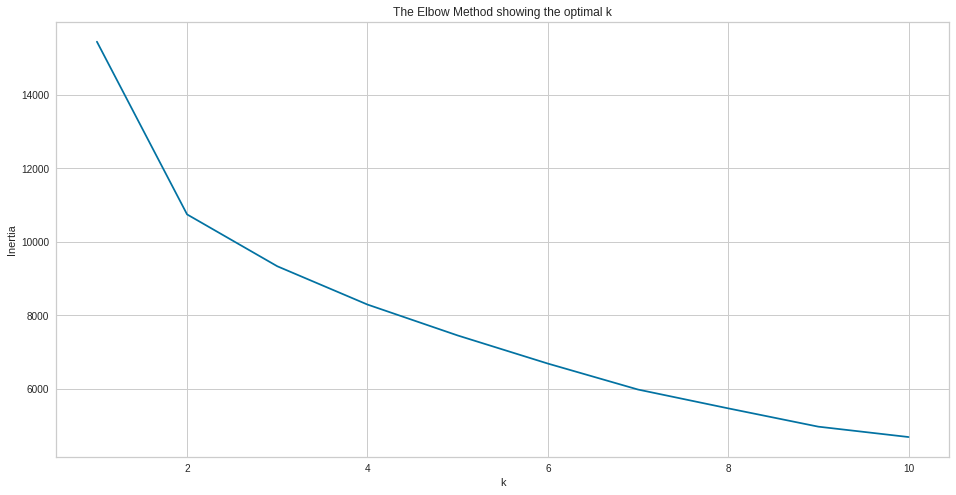

In [153]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, random_state = 7)
    kmeanModel.fit(std_data)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silhoutte Plot

For k=2, the average silhouette score is 0.31120204863132084
For k=3, the average silhouette score is 0.31221852979044634
For k=4, the average silhouette score is 0.33914750373016245
For k=5, the average silhouette score is 0.296428456793216
For k=6, the average silhouette score is 0.3232009341885681
For k=7, the average silhouette score is 0.34044036674104033
For k=8, the average silhouette score is 0.37756553774955526
For k=9, the average silhouette score is 0.3896079076623813
For k=10, the average silhouette score is 0.4018006589653651


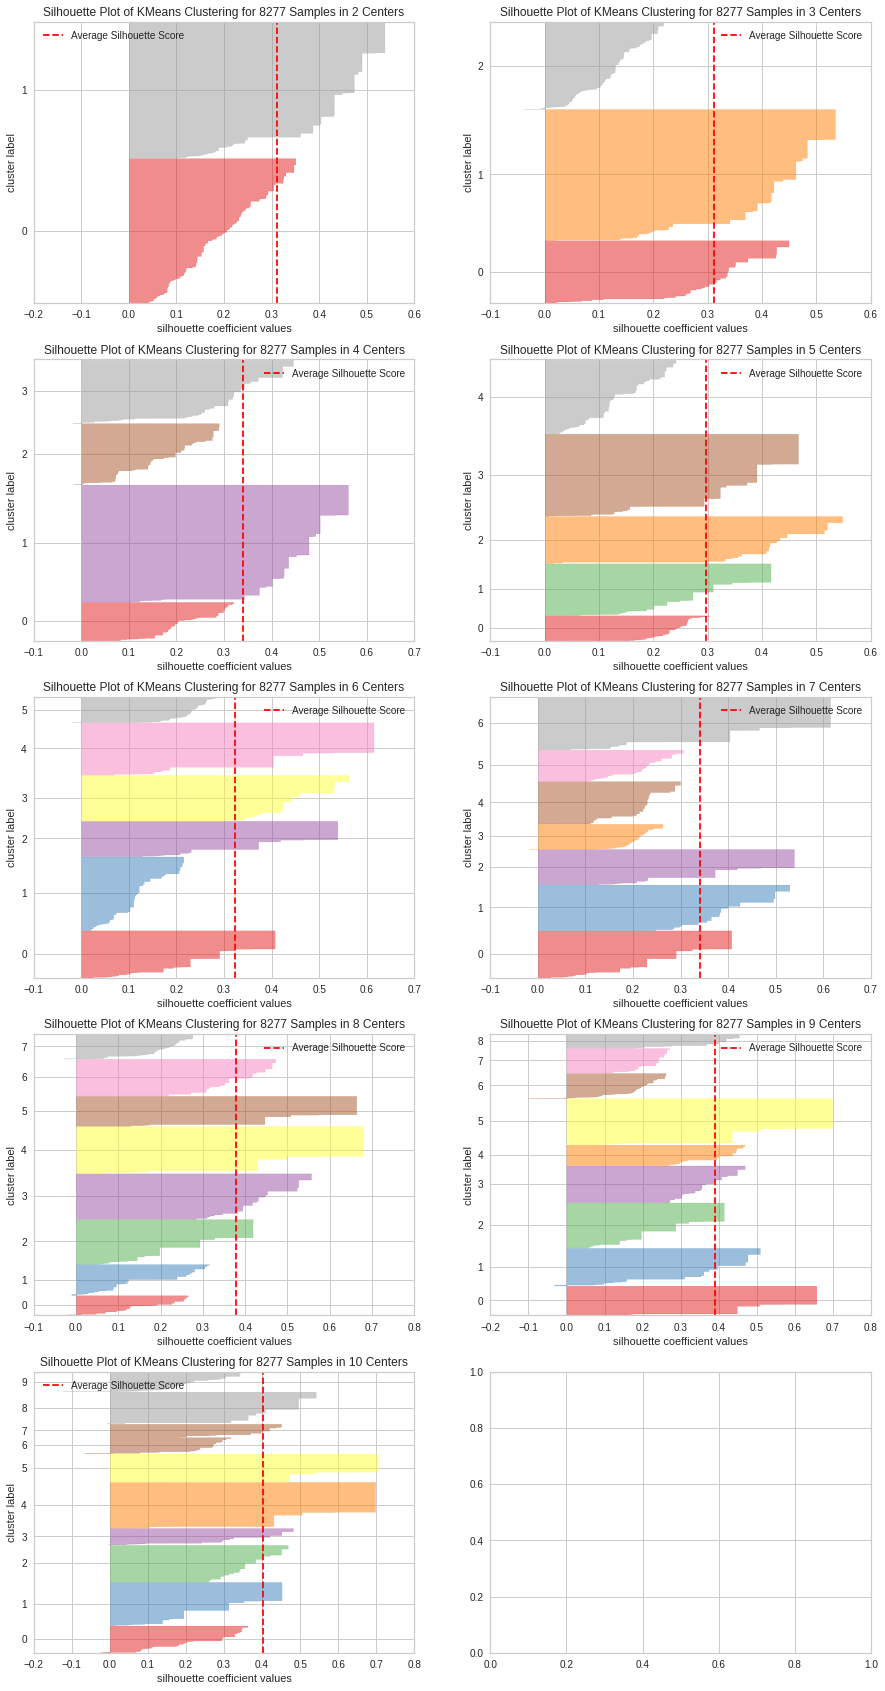

In [154]:
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(std_data)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

The elbow method doesn't seem give clear number of cluster (actually something around 8-10), while using Silhoutte, higher the number of cluster bigger the score. Since high number cluster will be difficult in making simple cluster, we can use the turning point on cluster 5

## Running All Features with K-Means

In [155]:
cluster_model = cluster.KMeans(n_clusters=5)
cluster_model.fit(std_data)
cluster_label = cluster_model.labels_
std_data['cluster'] = cluster_label
df_result = std_data.reset_index()[['user_id','cluster']]
df_result

,user_id,cluster
0,3940450,4
1,3953161,4
2,3764486,3
3,3739635,3
4,3861702,4
...,...,...
8272,3736480,2
8273,3916318,1
8274,3342940,4
8275,3805660,2


## Clustering Result

In [156]:
df_result = pd.merge((dfcust), df_result, on=['user_id'])
df_result

,user_id,reg_date,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,trans_date,Saham_AUM,...,Profit_Loss_Total,Total_Buy,Total_Sell,Trans_Month,Trans_Year,Trans_Day,Days,Net_Transaction,user_generation,cluster
0,3940450,2021-08-31 09:57:10,Male,28,Lainnya,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-30,11369.0,...,541.0,0.0,0.0,09,2021,30,Thu,0.0,Gen-Y,4
1,3953161,2021-09-02 01:15:20,Male,28,Pelajar,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-30,0.0,...,0.0,0.0,0.0,09,2021,30,Thu,0.0,Gen-Y,4
2,3764486,2021-08-22 16:48:11,Female,45,IRT,< 10 Juta,not used,Lainnya,2021-09-30,0.0,...,0.0,0.0,0.0,09,2021,30,Thu,0.0,Gen-X,3
3,3739635,2021-08-05 10:02:52,Female,48,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,2021-09-30,0.0,...,51672.0,0.0,0.0,09,2021,30,Thu,0.0,Gen-X,3
4,3861702,2021-08-19 12:42:57,Female,28,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,94599.0,...,4982.0,0.0,0.0,09,2021,30,Thu,0.0,Gen-Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3736480,2021-08-01 20:47:57,Female,24,Pelajar,Rp 10 Juta - 50 Juta,not used,Gaji,2021-09-30,200947.0,...,13168.0,0.0,0.0,09,2021,30,Thu,0.0,Gen-Z,2
8273,3916318,2021-08-27 17:34:15,Male,27,Swasta,> Rp 100 Juta,used referral,Gaji,2021-09-30,8888386.0,...,337561.0,10500.0,0.0,09,2021,30,Thu,10500.0,Gen-Y,1
8274,3342940,2021-08-18 08:58:52,Female,27,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,156280.0,...,6547.0,0.0,0.0,09,2021,30,Thu,0.0,Gen-Y,4
8275,3805660,2021-08-10 13:30:56,Female,24,Pelajar,> Rp 50 Juta - 100 Juta,not used,Gaji,2021-09-30,0.0,...,6611.0,0.0,0.0,09,2021,30,Thu,0.0,Gen-Z,2


In [157]:
df_result.groupby(['cluster'])[['user_id']].count()

,user_id
cluster,
0,1531
1,1973
2,2473
3,738
4,1562


The number of cluster seems even for all cluster

In [158]:
y_kmeans = cluster_model.fit_predict(std_data)

In [159]:
y_kmeans

array([3, 3, 4, ..., 3, 0, 0], dtype=int32)

In [160]:
std_data

,user_gender,user_income_range,referral_code_used,user_generation_Gen-X,user_generation_Gen-Y,user_generation_Gen-Z,user_occupation_IRT,user_occupation_Lainnya,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,cluster
user_id,,,,,,,,,,,,
3940450,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,4
3953161,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3764486,-1.0,-0.333333,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,3
3739635,-1.0,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,3
3861702,-1.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3736480,-1.0,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3916318,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,1
3342940,-1.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4


## Interpretating Cluster Result

In [161]:
categorical_col = ['user_gender','user_generation','user_occupation','user_income_range','referral_code_used']
invested_col = ['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']


In [162]:
std_data

,user_gender,user_income_range,referral_code_used,user_generation_Gen-X,user_generation_Gen-Y,user_generation_Gen-Z,user_occupation_IRT,user_occupation_Lainnya,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,cluster
user_id,,,,,,,,,,,,
3940450,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,4
3953161,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3764486,-1.0,-0.333333,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,3
3739635,-1.0,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,3
3861702,-1.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3736480,-1.0,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3916318,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,1
3342940,-1.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4


## Cluster Characteristic

In [163]:
df_cluster_0 = df_result[df_result['cluster'] == 0]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_0[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_0[invested_col].agg(['mean'])

df_invested

Value counts on user_gender collumn:
Male      0.68452
Female    0.31548
Name: user_gender, dtype: float64


Value counts on user_generation collumn:
Gen-Z    1.0
Name: user_generation, dtype: float64


Value counts on user_occupation collumn:
Pelajar      0.806662
Lainnya      0.124102
Swasta       0.033312
IRT          0.028739
Pengusaha    0.007185
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
< 10 Juta                  0.613325
Rp 10 Juta - 50 Juta       0.295232
> Rp 50 Juta - 100 Juta    0.077074
> Rp 100 Juta              0.014370
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
used referral    1.0
Name: referral_code_used, dtype: float64




,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,79697.177008,179223.041803,187925.483997,77226.062704


**Cluster 0**

* 61% Female
* 99% Gen Z
* 98% Are Students
* 63% earn less than Rp 10 Million
* 100 not using referral
* Mostly invested in Fixed Income Funds


In [164]:
df_cluster_1 = df_result[df_result['cluster'] == 1]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_1[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_1[invested_col].agg(['mean'])

df_invested

Value counts on user_gender collumn:
Male      0.634567
Female    0.365433
Name: user_gender, dtype: float64


Value counts on user_generation collumn:
Gen-Y    1.0
Name: user_generation, dtype: float64


Value counts on user_occupation collumn:
Swasta       0.685251
Lainnya      0.172326
IRT          0.071465
Pengusaha    0.070958
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
Rp 10 Juta - 50 Juta       0.378611
> Rp 50 Juta - 100 Juta    0.255449
< 10 Juta                  0.209326
> Rp 100 Juta              0.156614
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
not used         0.78814
used referral    0.21186
Name: referral_code_used, dtype: float64




,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,506426.26964,1.485462e+06,2.145197e+06,184996.871262


**Cluster 1**
* 68% Male
* 74% Gen Y
* 100% Working in Private Sectors
* 37% earn between Rp 10 - 50 Million
* 71% not using referral
* Mostly invested in Fixed Income Funds

In [165]:
df_cluster_2 = df_result[df_result['cluster'] == 2]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_2[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_2[invested_col].agg(['mean'])

df_invested

Value counts on user_gender collumn:
Male      0.627578
Female    0.372422
Name: user_gender, dtype: float64


Value counts on user_generation collumn:
Gen-Z    1.0
Name: user_generation, dtype: float64


Value counts on user_occupation collumn:
Pelajar      0.866154
Lainnya      0.080873
Swasta       0.039628
Pengusaha    0.007279
IRT          0.006066
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
< 10 Juta                  0.645370
Rp 10 Juta - 50 Juta       0.279418
> Rp 50 Juta - 100 Juta    0.067125
> Rp 100 Juta              0.008087
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
not used    1.0
Name: referral_code_used, dtype: float64




,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,142651.390619,364337.241003,464881.549131,17145.167812


**Cluster 2**
* 58& Male
* 100% Gen Y
* 70% are Students
* 38% earn between Rp 10-50 Million
* 68% Not using referral
* Mostly invested in Money Market Funds

In [166]:
df_cluster_3 = df_result[df_result['cluster'] == 3]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_3[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_3[invested_col].agg(['mean'])

df_invested

Value counts on user_gender collumn:
Male      0.544715
Female    0.455285
Name: user_gender, dtype: float64


Value counts on user_generation collumn:
Gen-X    1.0
Name: user_generation, dtype: float64


Value counts on user_occupation collumn:
Swasta       0.497290
IRT          0.219512
Lainnya      0.181572
Pengusaha    0.100271
Pelajar      0.001355
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
Rp 10 Juta - 50 Juta       0.304878
> Rp 100 Juta              0.265583
> Rp 50 Juta - 100 Juta    0.234417
< 10 Juta                  0.195122
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
not used         0.691057
used referral    0.308943
Name: referral_code_used, dtype: float64




,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,994426.039295,1.334825e+06,4.142903e+06,872695.121951


**Cluster 3**
* 66% Male
* 44% Gen Y
* 83% Working in "Others" section (Teacher, PNS, etc)
* 35% earn betweeb Rp 10 - 50 Million
* 56% not using referral
* Mostly invested in Fixed Income Funds


In [167]:
df_cluster_4 = df_result[df_result['cluster'] == 4]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_4[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_4[invested_col].agg(['mean'])

df_invested

Value counts on user_gender collumn:
Male      0.590269
Female    0.409731
Name: user_gender, dtype: float64


Value counts on user_generation collumn:
Gen-Y    1.0
Name: user_generation, dtype: float64


Value counts on user_occupation collumn:
Pelajar      0.701024
Lainnya      0.172855
IRT          0.074264
Pengusaha    0.051857
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
Rp 10 Juta - 50 Juta       0.378361
< 10 Juta                  0.278489
> Rp 50 Juta - 100 Juta    0.244558
> Rp 100 Juta              0.098592
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
not used         0.501921
used referral    0.498079
Name: referral_code_used, dtype: float64




,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,369346.837388,891460.008963,1.093814e+06,255711.523688


**Cluster 4**
* 66% Male
* 100% Gen Z
* 93% are Students
* 63% Earn Less Than Rp 10 Million
* 100% Using Referral
* Mostly invested in Fixed Income Funds